In [1]:
import pandas as pd 
import numpy as np
dataset = pd.read_csv('breast_cancer_with metastasis_andstage.csv')

In [2]:
dataset

Patient_ID  Age  Tumor_Size Tumor_Type Lymph_Node_Status  \
0        Patient_1   58    4.253744     Benign          Positive   
1        Patient_2   71    7.275465     Benign          Positive   
2        Patient_3   48    2.392545  Malignant          Positive   
3        Patient_4   34    8.957043  Malignant          Positive   
4        Patient_5   62    3.230391     Benign          Negative   
...            ...  ...         ...        ...               ...   
4995  Patient_4996   22    6.606619  Malignant          Negative   
4996  Patient_4997   47    7.081611  Malignant          Positive   
4997  Patient_4998   25    8.774192     Benign          Positive   
4998  Patient_4999   63    3.752174  Malignant          Positive   
4999  Patient_5000   63    7.812837  Malignant          Negative   

     Hormone_Receptor_Status Genetic_Mutation        Treatment  \
0                    Unknown            BRCA2     Chemotherapy   
1                   Negative            Other  Hormone Therapy   
2                   Positive            Other          Surgery   
3                   Positive            BRCA1        Radiation   
4                   Negative            Other          Surgery   
...                      ...              ...              ...   
4995                Positive            BRCA1          Surgery   
4996                Negative            Other  Hormone Therapy   
4997                Negative            BRCA2        Radiation   
4998                Negative            Other  Hormone Therapy   
4999                Negative            BRCA2     Chemotherapy   

     Survival_Status  Follow_Up_Duration  Blood_Pressure        BMI  \
0              Alive                  57             164  28.887681   
1           Deceased                  59             124  25.787189   
2           Deceased                  70              93  24.819432   
3           Deceased                  15             174  26.278296   
4              Alive                  86             101  31.455969   
...              ...                 ...             ...        ...   
4995        Deceased                  15             168  35.394491   
4996           Alive                  31              91  26.961928   
4997           Alive                  46             150  27.574926   
4998        Deceased                 108             150  36.677825   
4999        Deceased                  70              83  20.368516   

     Metastasis Cancer_Stage  
0      Negative      Stage I  
1      Negative      Stage I  
2      Negative     Stage II  
3      Positive     Stage IV  
4      Negative      Stage 0  
...         ...          ...  
4995   Negative    Stage III  
4996   Positive     Stage IV  
4997   Negative      Stage I  
4998   Negative     Stage II  
4999   Negative    Stage III  

[5000 rows x 14 columns]

In [3]:
dataset.columns

Index(['Patient_ID', 'Age', 'Tumor_Size', 'Tumor_Type', 'Lymph_Node_Status',
       'Hormone_Receptor_Status', 'Genetic_Mutation', 'Treatment',
       'Survival_Status', 'Follow_Up_Duration', 'Blood_Pressure', 'BMI',
       'Metastasis', 'Cancer_Stage'],
      dtype='object')

In [4]:
dataset.Genetic_Mutation.unique()

array(['BRCA2', 'Other', 'BRCA1'], dtype=object)

In [5]:
dataset.Treatment.unique()

array(['Chemotherapy', 'Hormone Therapy', 'Surgery', 'Radiation'],
      dtype=object)

In [6]:
dataset.Cancer_Stage.unique()

array(['Stage I', 'Stage II', 'Stage IV', 'Stage 0', 'Stage III',
       'Stage IA'], dtype=object)

In [7]:
len(dataset)

5000

In [8]:
dataset.Hormone_Receptor_Status.unique()

array(['Unknown', 'Negative', 'Positive'], dtype=object)

In [9]:
dataset.Survival_Status.unique()

array(['Alive', 'Deceased'], dtype=object)

In [10]:
unique_count = dataset['Hormone_Receptor_Status'].nunique()

In [11]:
unique_count

3

In [12]:
# Count the number of 'UNKNOWN' values using conditional filtering
unknown_count = dataset[dataset['Hormone_Receptor_Status'] == 'Unknown'].shape[0]

print(f"The number of 'UNKNOWN' values is: {unknown_count}")

The number of 'UNKNOWN' values is: 1652


# Using Unsupervised Learning to handle the missing unknown values in the Hormone_Receptor_Status of the Dataset

In [13]:
#Using the K Means Clustering Technique in the Unsupervised Machine Learning TECHNIQUES.
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [14]:
# Encode categorical variables
categorical_columns = ['Tumor_Type', 'Lymph_Node_Status', 'Genetic_Mutation', 'Treatment', 'Survival_Status', 'Metastasis', 'Cancer_Stage']

# Initialize Label Encoder
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column].astype(str))

# Select features to use for clustering
features = ['Age', 'Tumor_Size', 'Tumor_Type', 'Lymph_Node_Status', 'Genetic_Mutation', 'Treatment', 'Metastasis', 'Cancer_Stage']

# Separate the data for clustering
data_for_clustering = dataset[features]

# Standardize the features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)


In [15]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42) # K = 2 i.e: To cluster the hormone receptor status into two groups which are Positive and Negative
dataset['Cluster'] = kmeans.fit_predict(data_normalized)

# Display cluster centers and labels
dataset['Cluster'].value_counts()


Cluster
1    2519
0    2481
Name: count, dtype: int64

In [16]:
# Map clusters to "Hormone_Receptor_Status"
cluster_map = {
    0: 'Negative',  # Assuming cluster 0 corresponds to 'NEGATIVE'
    1: 'Positive'   # Assuming cluster 1 corresponds to 'POSITIVE'
}

# Assign the cluster-based status to 'UNKNOWN' values
dataset.loc[dataset['Hormone_Receptor_Status'] == 'Unknown', 'Hormone_Receptor_Status'] = dataset['Cluster'].map(cluster_map)

# Remove the 'Cluster' column as it's no longer needed
dataset.drop(columns=['Cluster'], inplace=True)

print("Updated Dataset with Assigned Values:\n", dataset.head())


Updated Dataset with Assigned Values:
   Patient_ID  Age  Tumor_Size  Tumor_Type  Lymph_Node_Status  \
0  Patient_1   58    4.253744           0                  1   
1  Patient_2   71    7.275465           0                  1   
2  Patient_3   48    2.392545           1                  1   
3  Patient_4   34    8.957043           1                  1   
4  Patient_5   62    3.230391           0                  0   

  Hormone_Receptor_Status  Genetic_Mutation  Treatment  Survival_Status  \
0                Negative                 1          0                0   
1                Negative                 2          1                1   
2                Positive                 2          3                1   
3                Positive                 0          2                1   
4                Negative                 2          3                0   

   Follow_Up_Duration  Blood_Pressure        BMI  Metastasis  Cancer_Stage  
0                  57             164  28.887681

In [17]:
dataset.head()

Patient_ID  Age  Tumor_Size  Tumor_Type  Lymph_Node_Status  \
0  Patient_1   58    4.253744           0                  1   
1  Patient_2   71    7.275465           0                  1   
2  Patient_3   48    2.392545           1                  1   
3  Patient_4   34    8.957043           1                  1   
4  Patient_5   62    3.230391           0                  0   

  Hormone_Receptor_Status  Genetic_Mutation  Treatment  Survival_Status  \
0                Negative                 1          0                0   
1                Negative                 2          1                1   
2                Positive                 2          3                1   
3                Positive                 0          2                1   
4                Negative                 2          3                0   

   Follow_Up_Duration  Blood_Pressure        BMI  Metastasis  Cancer_Stage  
0                  57             164  28.887681           0             1  
1                  59             124  25.787189           0             1  
2                  70              93  24.819432           0             3  
3                  15             174  26.278296           1             5  
4                  86             101  31.455969           0             0

In [18]:
data = pd.read_csv('breast_cancer_with metastasis_andstage.csv')
data.head()

Patient_ID  Age  Tumor_Size Tumor_Type Lymph_Node_Status  \
0  Patient_1   58    4.253744     Benign          Positive   
1  Patient_2   71    7.275465     Benign          Positive   
2  Patient_3   48    2.392545  Malignant          Positive   
3  Patient_4   34    8.957043  Malignant          Positive   
4  Patient_5   62    3.230391     Benign          Negative   

  Hormone_Receptor_Status Genetic_Mutation        Treatment Survival_Status  \
0                 Unknown            BRCA2     Chemotherapy           Alive   
1                Negative            Other  Hormone Therapy        Deceased   
2                Positive            Other          Surgery        Deceased   
3                Positive            BRCA1        Radiation        Deceased   
4                Negative            Other          Surgery           Alive   

   Follow_Up_Duration  Blood_Pressure        BMI Metastasis Cancer_Stage  
0                  57             164  28.887681   Negative      Stage I  
1                  59             124  25.787189   Negative      Stage I  
2                  70              93  24.819432   Negative     Stage II  
3                  15             174  26.278296   Positive     Stage IV  
4                  86             101  31.455969   Negative      Stage 0

In [19]:
dataset.Genetic_Mutation.unique() # BRCA2: 1, BRCA1: 0, Other: 2

array([1, 2, 0])

In [20]:
data.Genetic_Mutation.unique()

array(['BRCA2', 'Other', 'BRCA1'], dtype=object)

In [21]:
dataset.Treatment.unique() # Chemotherapy: 0, Hormone Therapy: 1, Surgery: 3, Radiation: 2

array([0, 1, 3, 2])

In [22]:
data.Treatment. unique() 

array(['Chemotherapy', 'Hormone Therapy', 'Surgery', 'Radiation'],
      dtype=object)

In [23]:
dataset.Cancer_Stage.unique() # Stage 0: 0, Stage I: 1, Stage IA: 2, Stage II: 3, Stage III: 4, Stage IV: 5.

array([1, 3, 5, 0, 4, 2])

In [24]:
data.Cancer_Stage.unique() 

array(['Stage I', 'Stage II', 'Stage IV', 'Stage 0', 'Stage III',
       'Stage IA'], dtype=object)

In [25]:
dataset.Survival_Status.unique() # Alive: 0, Deceased: 1

array([0, 1])

In [26]:
data.Survival_Status.unique()

array(['Alive', 'Deceased'], dtype=object)

In [27]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Hormone_Receptor_Status" column
dataset['Hormone_Receptor_Status'] = label_encoder.fit_transform(dataset['Hormone_Receptor_Status'])

# Display the encoded values
print(dataset['Hormone_Receptor_Status'].value_counts())

Hormone_Receptor_Status
0    2514
1    2486
Name: count, dtype: int64


In [28]:
data.Hormone_Receptor_Status.unique()

array(['Unknown', 'Negative', 'Positive'], dtype=object)

In [29]:
dataset.Hormone_Receptor_Status.unique() # Negative = 0, Positive = 1.

array([0, 1])

In [30]:
dataset.head()

Patient_ID  Age  Tumor_Size  Tumor_Type  Lymph_Node_Status  \
0  Patient_1   58    4.253744           0                  1   
1  Patient_2   71    7.275465           0                  1   
2  Patient_3   48    2.392545           1                  1   
3  Patient_4   34    8.957043           1                  1   
4  Patient_5   62    3.230391           0                  0   

   Hormone_Receptor_Status  Genetic_Mutation  Treatment  Survival_Status  \
0                        0                 1          0                0   
1                        0                 2          1                1   
2                        1                 2          3                1   
3                        1                 0          2                1   
4                        0                 2          3                0   

   Follow_Up_Duration  Blood_Pressure        BMI  Metastasis  Cancer_Stage  
0                  57             164  28.887681           0             1  
1                  59             124  25.787189           0             1  
2                  70              93  24.819432           0             3  
3                  15             174  26.278296           1             5  
4                  86             101  31.455969           0             0

In [31]:
dataset.Tumor_Type.unique()

array([0, 1])

In [32]:
dataset.Tumor_Type.value_counts()

Tumor_Type
1    2519
0    2481
Name: count, dtype: int64

In [33]:
dataset.Cancer_Stage.value_counts()

Cancer_Stage
0    1269
4    1239
1    1212
5     647
3     448
2     185
Name: count, dtype: int64

In [34]:
dataset.Treatment.value_counts()

Treatment
1    1298
3    1275
2    1223
0    1204
Name: count, dtype: int64

In [35]:
Tumor_Type = 'Tumor_Type'
columns = [col for col in dataset.columns if col != Tumor_Type]  # List all of the coliumns except Tumor_Type
columns.append(Tumor_Type) # Add tumor_type to the end of the list

# Reorder thte Dataframe
dataset = dataset[columns]
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Treatment  Survival_Status  Follow_Up_Duration  \
0                 1          0                0                  57   
1                 2          1                1                  59   
2                 2          3                1                  70   
3                 0          2                1                  15   
4                 2          3                0                  86   

   Blood_Pressure        BMI  Metastasis  Cancer_Stage  Tumor_Type  
0             164  28.887681           0             1           0  
1             124  25.787189           0             1           0  
2              93  24.819432           0             3           1  
3             174  26.278296           1             5           1  
4             101  31.455969           0             0           0

In [36]:
Treatment = 'Treatment'
columns = [col for col in dataset.columns if col != Treatment]  # List all of the coliumns except Treatment
columns.append(Treatment) # Add treatment to the end of the list

# Reorder thte Dataframe
dataset = dataset[columns]
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Survival_Status  Follow_Up_Duration  Blood_Pressure  \
0                 1                0                  57             164   
1                 2                1                  59             124   
2                 2                1                  70              93   
3                 0                1                  15             174   
4                 2                0                  86             101   

         BMI  Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0  28.887681           0             1           0          0  
1  25.787189           0             1           0          1  
2  24.819432           0             3           1          3  
3  26.278296           1             5           1          2  
4  31.455969           0             0           0          3

In [37]:
dataset = dataset.drop ('Survival_Status', axis = 1)
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

# APPLYING THE MACHINE LEARNING TECHNIQUES

In [ ]:
# Save the merged data to a new CSV file
dataset.to_csv('Latest_breast_cancer_data.csv', index=False)


In [22]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Latest_breast_cancer_data.csv')
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

Epoch 1/100


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5318 - loss: 0.6925 - val_accuracy: 0.6540 - val_loss: 0.6732
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6664 - loss: 0.6657 - val_accuracy: 0.6550 - val_loss: 0.6593
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6629 - loss: 0.6579 - val_accuracy: 0.6550 - val_loss: 0.6541
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6762 - loss: 0.6439 - val_accuracy: 0.6550 - val_loss: 0.6505
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6642 - loss: 0.6469 - val_accuracy: 0.6550 - val_loss: 0.6487
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6558 - loss: 0.6471 - val_accuracy: 0.6550 - val_loss: 0.6476
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6685 - loss: 0.6392 - val_accuracy: 0.6550 - val_loss: 0.6470
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6616 - loss: 0.6407 - val_accuracy: 0.6550

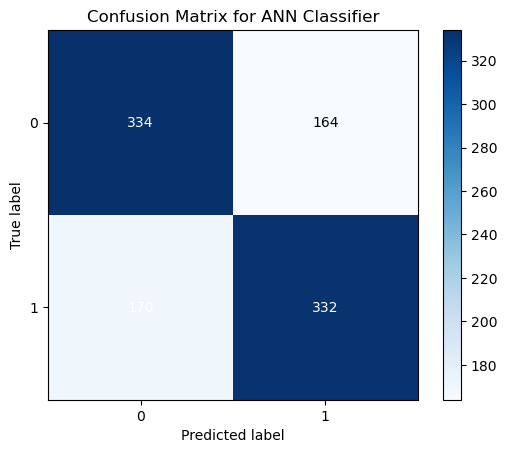

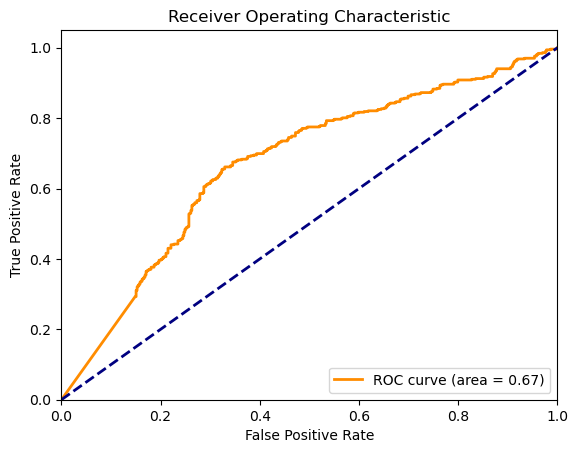

AUC: 0.67


In [3]:
# Artificial Neural Networks 
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt  # Make sure scikit-plot is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Importing the dataset
dataset
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values # Tumor Type

# Splitting the dataset into the Training set, Validation set, and Test set
# First split: Train + Validation and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Second split: Train and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) 
# 0.25 * 0.8 = 0.2 (20% of the original data)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Building the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu', input_dim=8))

# Adding the second hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set with separate validation set
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100)

# Predicting the Test set results
y_pred_proba = classifier.predict(X_test)  # Get probabilities for ROC and AUC
y_pred = (y_pred_proba > 0.5)  # Convert probabilities to class labels

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Classification Report and Confusion Matrix for test set
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# Visualize the ROC Curve
# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")


In [4]:
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

In [40]:
# Artificial Neural Networks
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import scikitplot as skplt  # Make sure scikit-plot is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Importing the dataset
dataset 
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values  # Tumor type

# Splitting the dataset into Training + Validation and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train_val = sc.fit_transform(X_train_val)
X_test = sc.transform(X_test)

# Initialize KFold with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# List to store scores for each fold
fold_accuracies = []

for train_idx, val_idx in kfold.split(X_train_val):
    # Split into training and validation based on KFold indices
    X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
    y_train, y_val = y_train_val[train_idx], y_train_val[val_idx]
    
    # Build the ANN model
    classifier = Sequential()
    classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu', input_shape=(8,)))
    classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Calculate class weights
    class_weights = {0: 1.5, 1: 1.0}
    
    # Train the model with class weights
    history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100, verbose=0, class_weight=class_weights)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = classifier.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)




In [ ]:
# Calculate the average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f"Average Accuracy across {kfold.get_n_splits()} folds: {avg_accuracy:.4f}")

# Final model training on the entire training+validation data
classifier.fit(X_train_val, y_train_val, batch_size=10, epochs=100, verbose=0, class_weight=class_weights)



Test Accuracy: 0.6670
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

ANN Classifier:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       498
           1       0.67      0.66      0.66       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[338 160]
 [173 329]]
Accuracy for class 0: 0.6787
Accuracy for class 1: 0.6554


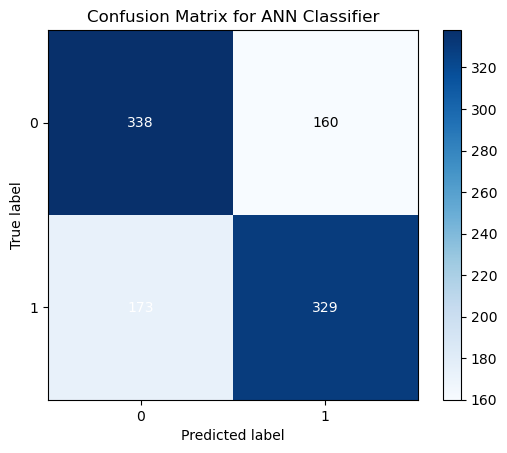

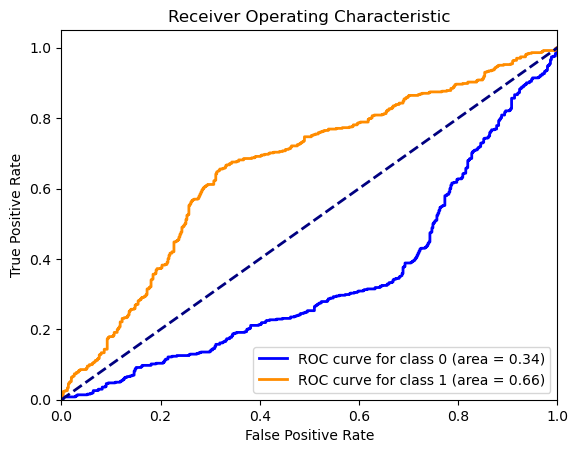

AUC for class 0: 0.34
AUC for class 1: 0.66


In [43]:
# Evaluate the model on the test set
test_loss, test_accuracy = classifier.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predicting the Test set results
y_pred_proba = classifier.predict(X_test)  # Get probabilities for ROC and AUC
y_pred = (y_pred_proba > 0.5)  # Convert probabilities to class labels

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Classification Report and Confusion Matrix for the test set
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# Visualize the ROC Curve for both classes
# Compute ROC curve and ROC area for each class
fpr_0, tpr_0, _ = roc_curve(y_test, 1 - y_pred_proba)  # For class 0
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred_proba)  # For class 1
roc_auc_0 = auc(fpr_0, tpr_0)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot ROC Curve for both classes
plt.figure()
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'ROC curve for class 0 (area = {roc_auc_0:.2f})')
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'ROC curve for class 1 (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score for both classes
auc_value_0 = roc_auc_score(y_test, 1 - y_pred_proba)
auc_value_1 = roc_auc_score(y_test, y_pred_proba)
print(f"AUC for class 0: {auc_value_0:.2f}")
print(f"AUC for class 1: {auc_value_1:.2f}")


Cross Validation Scores: [0.65       0.66666667 0.65666667 0.67       0.69333333]
Average CV Score: 0.6673333333333333
Validation Accuracy: 0.655
Test Accuracy: 0.666

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       498
           1       0.67      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[334 164]
 [170 332]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.6614


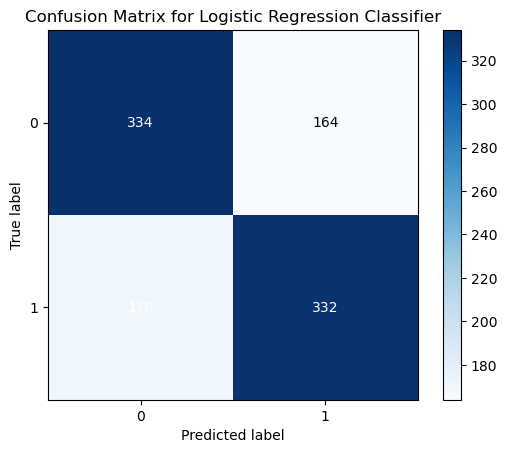

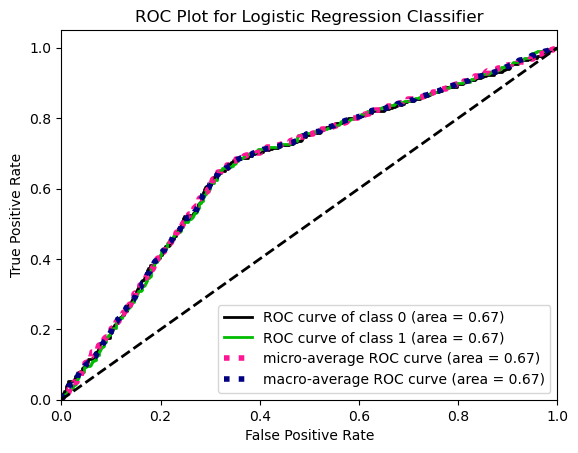

AUC: 0.67

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [5]:
# Logistic Regression Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
from sklearn import metrics

# Importing the dataset
dataset

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values # Tumoe type


# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
cv_scores = cross_val_score(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000), X_train, y_train, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Make predictions on validation set
y_pred_val = model.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_pred_test = model.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nLogistic Regression Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Visualize the ROC Curve
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Logistic Regression Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())





Cross Validation Scores: [0.65       0.66666667 0.65666667 0.67       0.69333333]
Average CV Score: 0.6673333333333333
Validation Accuracy: 0.655
Test Accuracy: 0.666

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       498
           1       0.67      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[334 164]
 [170 332]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.6614


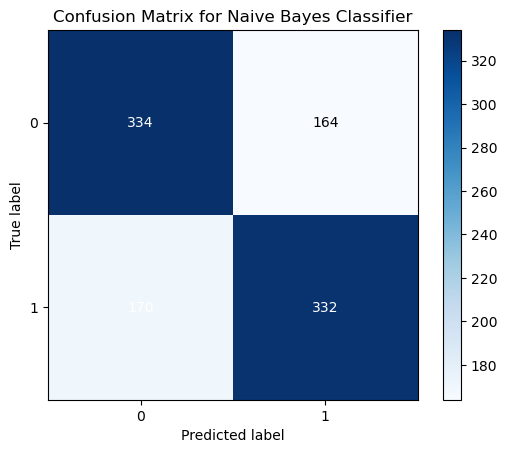

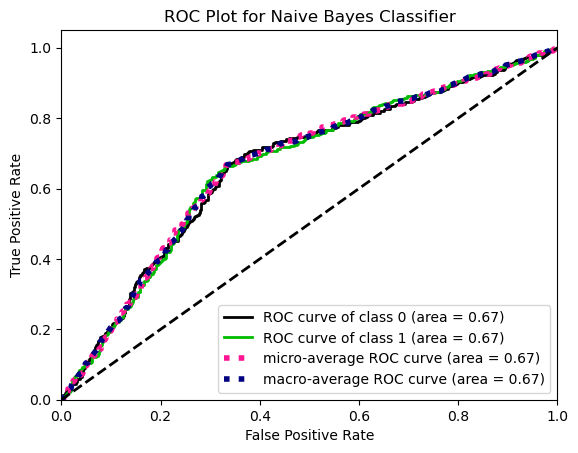

AUC: 0.67
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [6]:
# Naive Bayes Algorithm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Importing the dataset
dataset

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Naive Bayes classifier
NBclassifier = GaussianNB()

# Train the model
NBclassifier.fit(X_train, y_train)

# Perform Cross Validation
k = 5
scores = cross_val_score(NBclassifier, X_train, y_train, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = NBclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_predNB = NBclassifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predNB)
print("Test Accuracy:", accuracy)

# Print Classification Report and Confusion Matrix
print("\nNaive Bayes Classifier:")
print(classification_report(y_test, y_predNB))
cm = confusion_matrix(y_test, y_predNB)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize metrics using Scikit-Plot
skplt.metrics.plot_confusion_matrix(y_test, y_predNB, normalize=False, title='Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Visualize the ROC Curve
y_NB_proba = NBclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_NB_proba, title='ROC Plot for Naive Bayes Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = NBclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predNB, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(NBclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print(results_table.head())


In [7]:
y = dataset.iloc[:, 11].values # Tumor Type
y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

Cross Validation Scores: [0.5     0.525   0.51625 0.47875 0.52125]
Average CV Score: 0.50825
Validation Accuracy: 0.508
Test Accuracy: 0.508

KNN Classifier:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       498
           1       0.51      0.52      0.51       502

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

Confusion Matrix:
[[249 249]
 [243 259]]
Accuracy for class 0: 0.5000
Accuracy for class 1: 0.5159


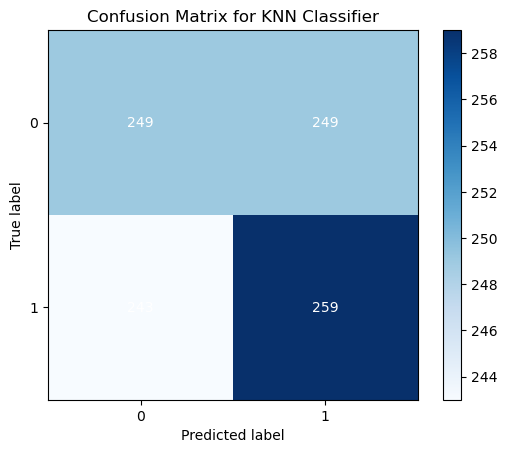

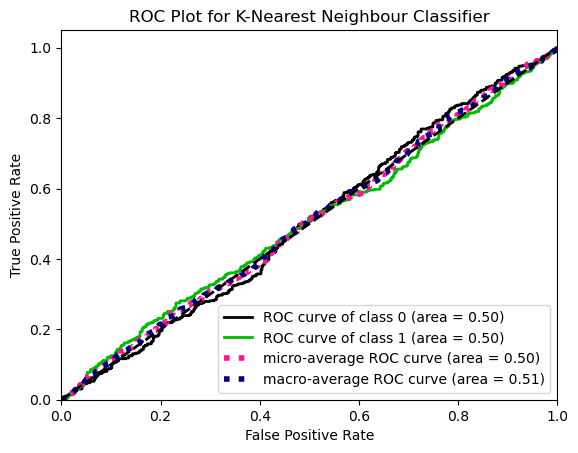

AUC: 0.51

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        1.0   
3                   0.0              0              1.0        1.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0              -1.0        -1.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         1.0  
3             0.0               1.0         1.0  
4             0.0               0.0         0.0  


In [8]:
# KNN Classifier 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

# Importing the dataset
dataset 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values # Tumor Type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting KNN to the Training Set
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski', p=2, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
cv_scores = cross_val_score(knn_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Make predictions on validation set
y_pred_val = knn_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_pred_test = knn_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nKNN Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for KNN Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for K-Nearest Neighbour Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = knn_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(knn_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


In [9]:
# SVC Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values  #Tumor Type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Instantiate the SVC model
SVCclassifier = SVC(C=10, kernel='linear', decision_function_shape="ovr", probability = True, random_state=0)

# Train the model
SVCclassifier.fit(X_train, y_train)


# Perform Cross Validation on training set
k = 5
scores = cross_val_score(SVCclassifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = SVCclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predSVC = SVCclassifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predSVC)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_predSVC))
cm = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predSVC, normalize=False, title='Confusion Matrix for SVC Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = SVCclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = SVCclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predSVC, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(SVCclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predSVC, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())



In [10]:
# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Instantiate the SVC model
SVCclassifier = SVC(C=10, kernel='linear', decision_function_shape="ovr", probability = True, random_state=0)

# Train the model
SVCclassifier.fit(X_train, y_train)



SVC(C=10, kernel='linear', probability=True, random_state=0)

In [11]:

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(SVCclassifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())



Cross Validation Scores: [0.66625 0.67875 0.67375 0.635   0.6675 ]
Average CV Score: 0.6642499999999999


In [12]:
# Make predictions on validation set
y_pred_val = SVCclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predSVC = SVCclassifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predSVC)
print("Test Accuracy:", accuracy_test)



Validation Accuracy: 0.655
Test Accuracy: 0.666



SVC Classifier:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       498
           1       0.67      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[334 164]
 [170 332]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.6614


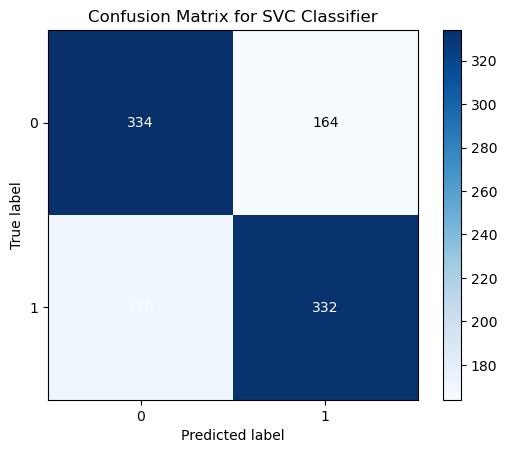

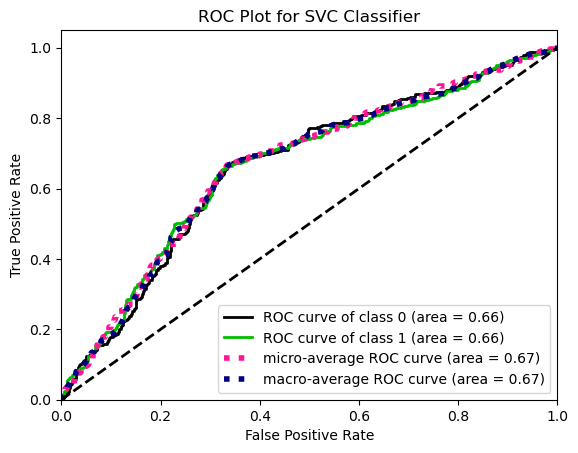

AUC: 0.67

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [13]:
# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_predSVC))
cm = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predSVC, normalize=False, title='Confusion Matrix for SVC Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = SVCclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = SVCclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predSVC, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(SVCclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predSVC, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


Cross Validation Scores: [0.55    0.5475  0.53625 0.5225  0.5475 ]
Average CV Score: 0.54075
Validation Accuracy: 0.575
dt_Accuracy: 0.551


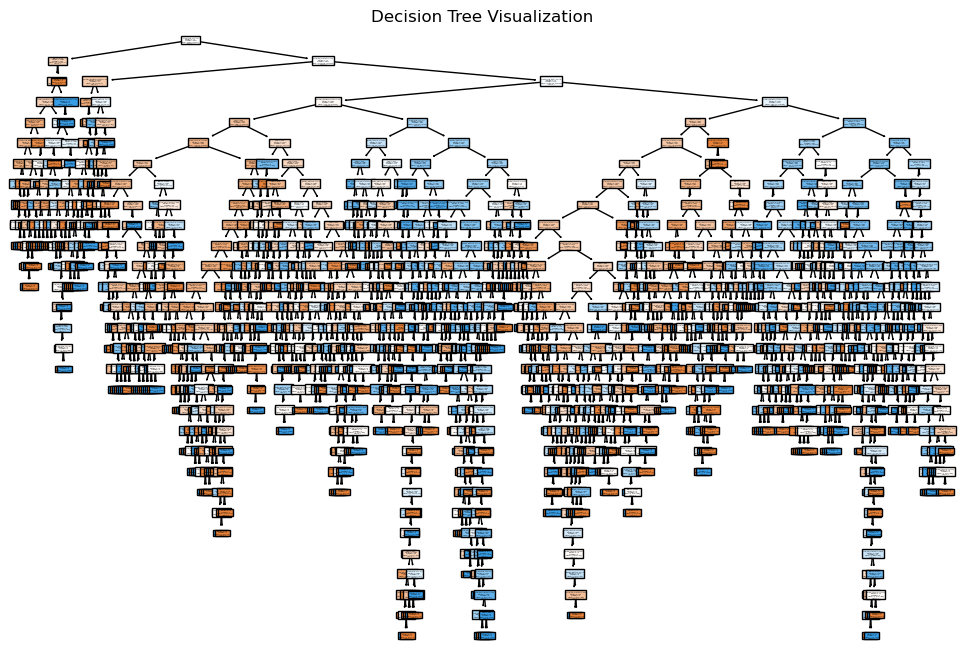


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       498
           1       0.55      0.57      0.56       502

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000

Confusion Matrix:
[[264 234]
 [215 287]]
Accuracy for class 0: 0.5301
Accuracy for class 1: 0.5717


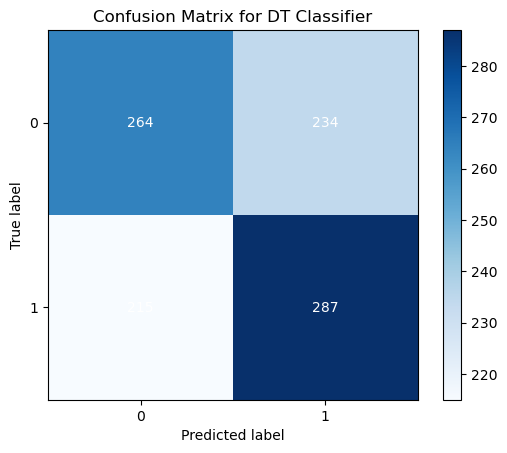

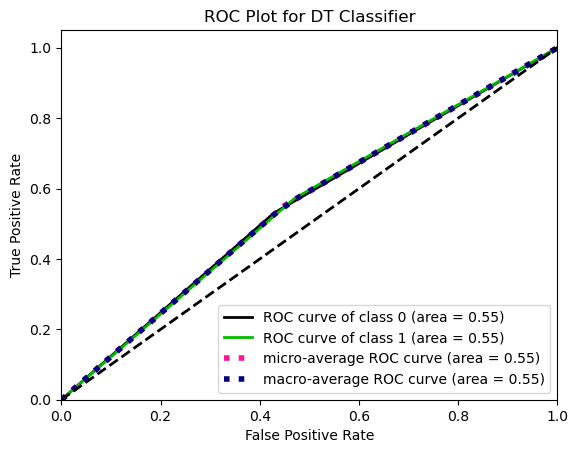

AUC: 0.55

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              0.0        1.0   
1                   1.0              1              1.0        1.0   
2                   0.0              1              0.0        0.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              1.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0              -1.0         0.0  
1             0.0               0.0         0.0  
2             1.0               0.0         0.0  
3             0.0               0.0         0.0  
4             0.0               1.0         0.0  


In [14]:
# Decision Tree Classifier without hyperparameter tuning using RandomizedSearch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Importing the dataset
dataset 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting Decision Tree Classifier to the Training Set
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,
                                       max_features='sqrt', class_weight='balanced', random_state=0)

# Train the model
dt_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_preddt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preddt)
print("dt_Accuracy:", accuracy)

# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()

# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}
Cross Validation Scores: [0.56625 0.5575  0.54125 0.50125 0.535  ]
Average CV Score: 0.54025
Validation Accuracy: 0.704
DT_Test Accuracy: 0.625


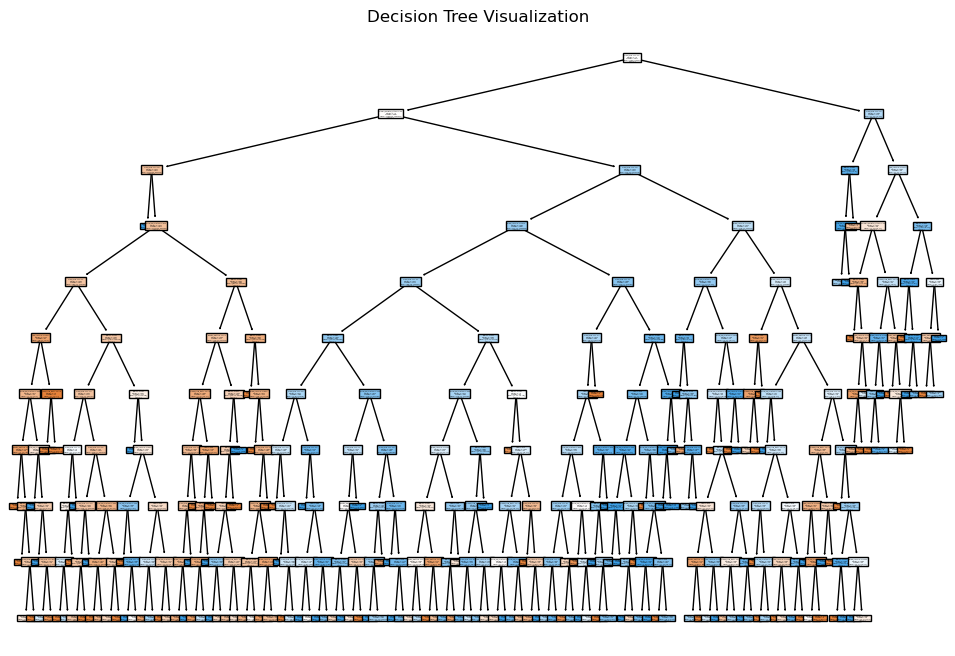


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       498
           1       0.64      0.57      0.60       502

    accuracy                           0.62      1000
   macro avg       0.63      0.63      0.62      1000
weighted avg       0.63      0.62      0.62      1000

Confusion Matrix:
[[340 158]
 [217 285]]
Accuracy for class 0: 0.6827
Accuracy for class 1: 0.5677


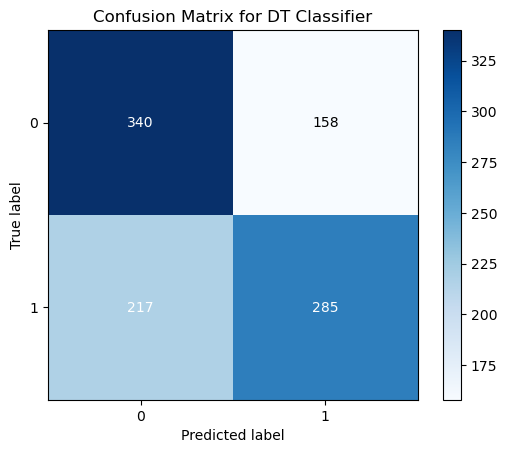

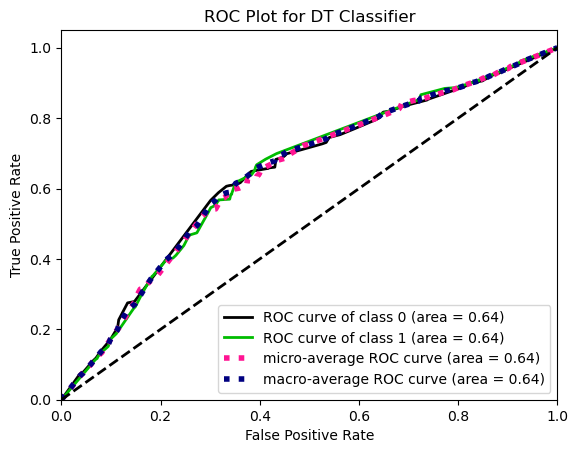

AUC: 0.63

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              1.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0               0.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [15]:
# Decision Tree Classifier with RandomizedSearch hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values   #Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', None]  # Weights associated with classes
}

# Create an instance of Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_dt_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_preddt = best_dt_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_preddt)
print("DT_Test Accuracy:", accuracy_test)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()


# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

Cross Validation Scores: [0.6425  0.64125 0.635   0.615   0.64875]
Average CV Score: 0.6365000000000001
Validation Accuracy: 0.637
rf_Accuracy: 0.636


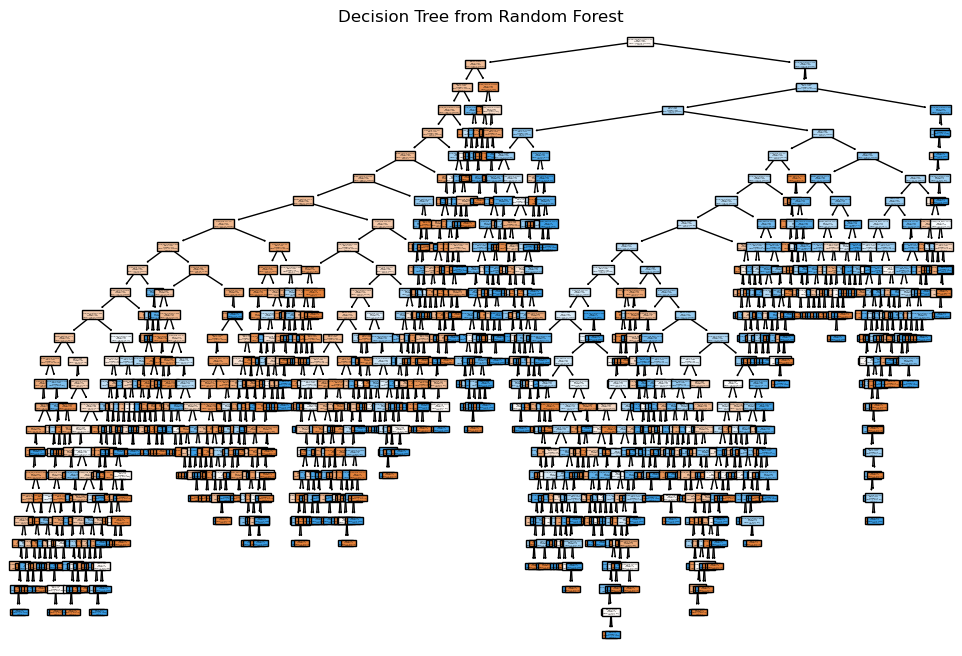


 Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       498
           1       0.64      0.63      0.64       502

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000

Confusion Matrix:
[[319 179]
 [185 317]]
Accuracy for class 0: 0.6406
Accuracy for class 1: 0.6315


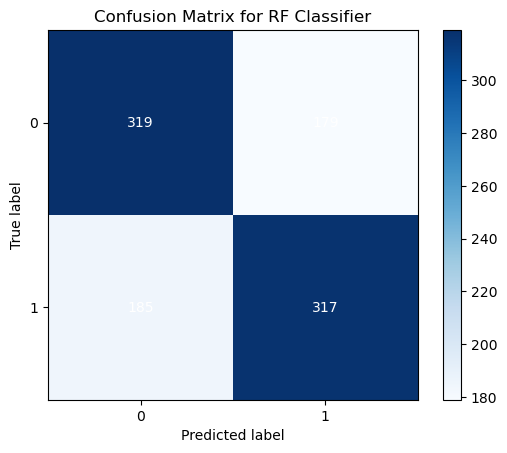

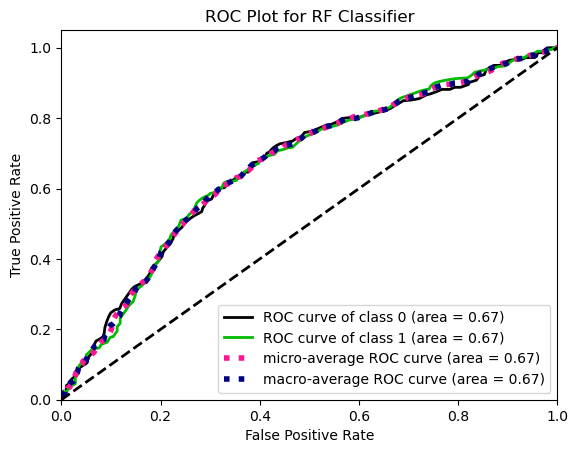

AUC: 0.64

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              0.0        1.0   
1                   1.0              1              1.0        1.0   
2                   0.0              1              0.0        0.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0              -1.0         0.0  
1             0.0               0.0         0.0  
2             1.0               0.0         0.0  
3             0.0               0.0         0.0  
4             0.0               0.0         0.0  


In [16]:
# Random Forest Classifier without Hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Importing the dataset
dataset 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values  #Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting RandomForestClassifier to the Training Set
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,
                                       max_features='sqrt', class_weight='balanced', random_state=0)

# Train the model
rf_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(rf_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = rf_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_predrf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predrf)
print("rf_Accuracy:", accuracy)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 3: Extract a single tree from the random forest (e.g., the first tree)
single_tree = rf_classifier.estimators_[0]

# Step 4: Visualize the single decision tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree from Random Forest")
plt.show()

# Print Classification Report and Confusion Matrix
print("\n Random Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predrf, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

In [23]:
# Random Forest Classifier with Hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 11].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Create an instance of Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_rf_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(best_rf_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_rf_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("rf_Test Accuracy:", accuracy_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 3: Extract a single tree from the random forest (e.g., the first tree)
single_tree = best_rf_classifier.estimators_[0]

# Step 4: Visualize the single decision tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree from Random Forest")
plt.show()

# Print Classification Report and Confusion Matrix
print("\n Random Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_rf_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predrf, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


In [24]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_rf_classifier = random_search.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}


Cross Validation Scores: [0.665   0.66625 0.67125 0.63625 0.665  ]
Average CV Score: 0.66075
Validation Accuracy: 0.744
rf_Test Accuracy: 0.662


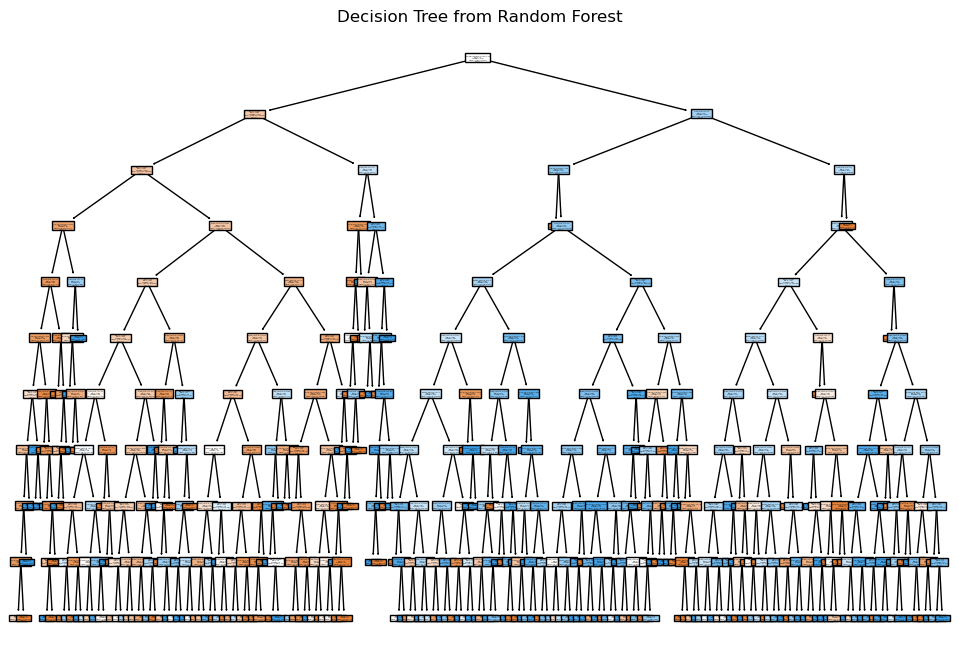


 Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       498
           1       0.66      0.66      0.66       502

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000

Confusion Matrix:
[[331 167]
 [171 331]]
Accuracy for class 0: 0.6647
Accuracy for class 1: 0.6594


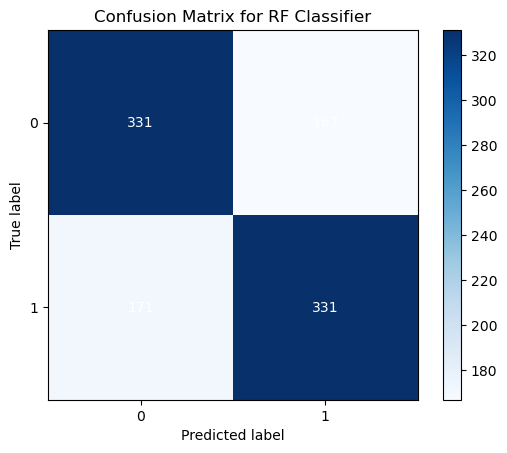

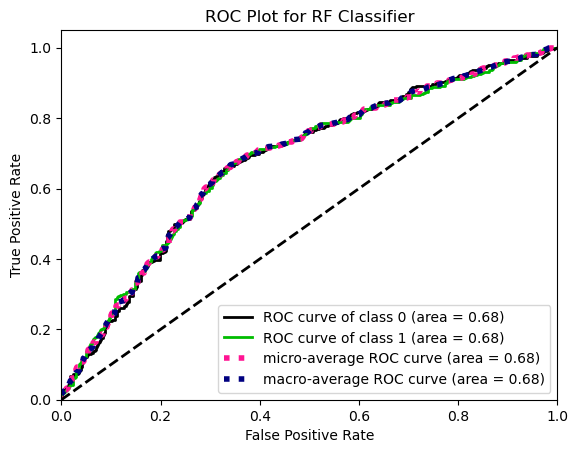

AUC: 0.66

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              0.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               0.0         0.0  
3             1.0               0.0         0.0  
4             0.0               0.0         0.0  


In [25]:
# Perform Cross Validation on training set
k = 5
scores = cross_val_score(best_rf_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_rf_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("rf_Test Accuracy:", accuracy_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 3: Extract a single tree from the random forest (e.g., the first tree)
single_tree = best_rf_classifier.estimators_[0]

# Step 4: Visualize the single decision tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree from Random Forest")
plt.show()

# Print Classification Report and Confusion Matrix
print("\n Random Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_rf_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predrf, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

In [27]:
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

In [28]:
data1 = dataset.drop ('Patient_ID', axis = 1)
data1.head()

Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0   58    4.253744                  1                        0   
1   71    7.275465                  1                        0   
2   48    2.392545                  1                        1   
3   34    8.957043                  1                        1   
4   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

In [29]:
# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Display the correlation matrix
print(correlation_matrix)

# Correlation with the target variable
target_variable = 'Tumor_Type'  # Replace with your actual target column name
correlation_with_target = correlation_matrix[target_variable]

# Display the correlations with the target variable
print(correlation_with_target)


                              Age  Tumor_Size  Lymph_Node_Status  \
Age                      1.000000   -0.002474          -0.019174   
Tumor_Size              -0.002474    1.000000           0.009554   
Lymph_Node_Status       -0.019174    0.009554           1.000000   
Hormone_Receptor_Status  0.021519    0.009248           0.019196   
Genetic_Mutation         0.016277    0.016857           0.012028   
Follow_Up_Duration      -0.015746   -0.026613          -0.002363   
Blood_Pressure          -0.009710    0.002648           0.002261   
BMI                     -0.011025    0.007776           0.005788   
Metastasis              -0.006098    0.323160           0.385838   
Cancer_Stage             0.011014    0.148674           0.215460   
Tumor_Type               0.014033    0.000084           0.022007   
Treatment               -0.014726   -0.008760          -0.000170   

                         Hormone_Receptor_Status  Genetic_Mutation  \
Age                                     0.021

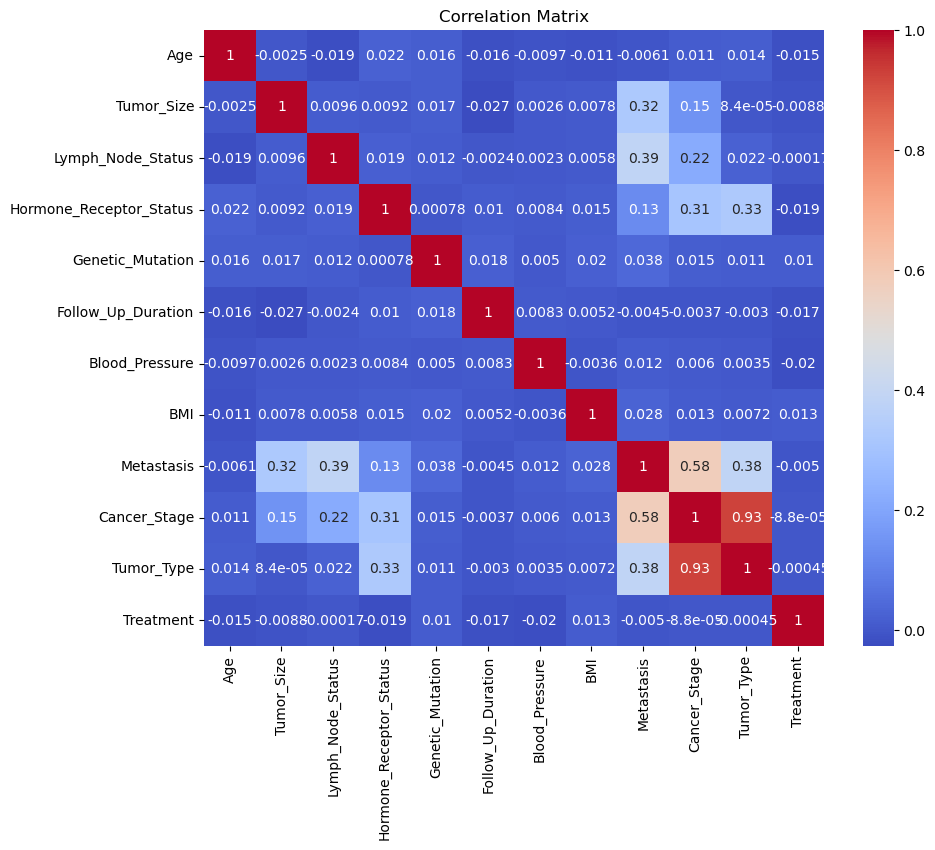

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Latest_breast_cancer_data.csv')
dataset.head()

Patient_ID  Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0  Patient_1   58    4.253744                  1                        0   
1  Patient_2   71    7.275465                  1                        0   
2  Patient_3   48    2.392545                  1                        1   
3  Patient_4   34    8.957043                  1                        1   
4  Patient_5   62    3.230391                  0                        0   

   Genetic_Mutation  Follow_Up_Duration  Blood_Pressure        BMI  \
0                 1                  57             164  28.887681   
1                 2                  59             124  25.787189   
2                 2                  70              93  24.819432   
3                 0                  15             174  26.278296   
4                 2                  86             101  31.455969   

   Metastasis  Cancer_Stage  Tumor_Type  Treatment  
0           0             1           0          0  
1           0             1           0          1  
2           0             3           1          3  
3           1             5           1          2  
4           0             0           0          3

In [2]:
dataset2 = dataset.drop (['Patient_ID', 'Follow_Up_Duration', 'Blood_Pressure', 'BMI','Cancer_Stage', 'Treatment'], axis = 1)
dataset2.head()

Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0   58    4.253744                  1                        0   
1   71    7.275465                  1                        0   
2   48    2.392545                  1                        1   
3   34    8.957043                  1                        1   
4   62    3.230391                  0                        0   

   Genetic_Mutation  Metastasis  Tumor_Type  
0                 1           0           0  
1                 2           0           0  
2                 2           0           1  
3                 0           1           1  
4                 2           0           0

C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4979 - loss: 0.6921 - val_accuracy: 0.4910 - val_loss: 0.6722
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6295 - loss: 0.6504 - val_accuracy: 0.6970 - val_loss: 0.6138
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7124 - loss: 0.5822 - val_accuracy: 0.7370 - val_loss: 0.5405
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7350 - loss: 0.5384 - val_accuracy: 0.7480 - val_loss: 0.5242
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7374 - loss: 0.5335 - val_accuracy: 0.7480 - val_loss: 0.5192
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7393 - loss: 0.5213 - val_accuracy: 0.7490 - val_loss: 0.5169
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7433 - loss: 0.5211 - val_accuracy: 0.7440 - val_loss: 0.5142
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7442 - loss: 0.5129 - val_accu

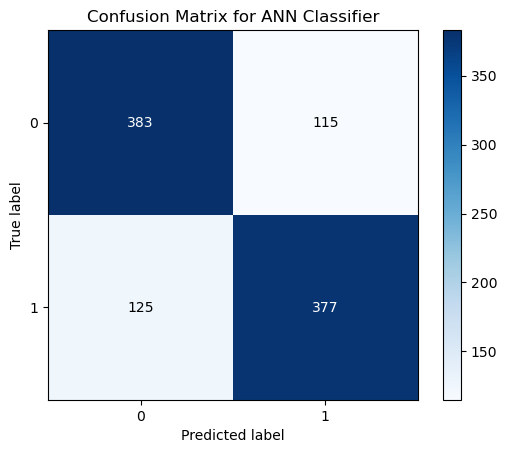

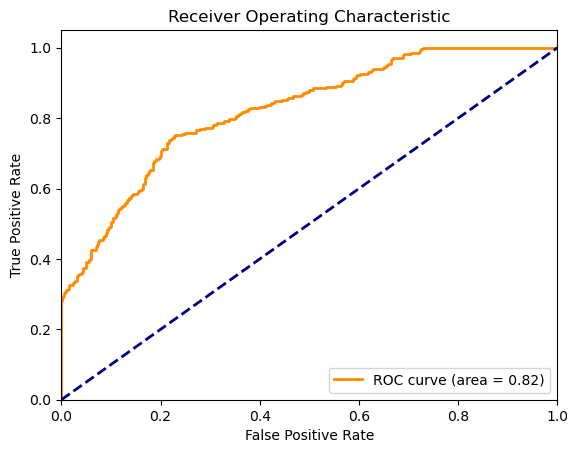

AUC: 0.82


In [3]:
# Artificial Neural Networks 
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt  # Make sure scikit-plot is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Importing the dataset
dataset
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values # Tumor Type

# Splitting the dataset into the Training set, Validation set, and Test set
# First split: Train + Validation and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Second split: Train and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) 
# 0.25 * 0.8 = 0.2 (20% of the original data)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Building the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu', input_dim=6))

# Adding the second hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set with separate validation set
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100)

# Predicting the Test set results
y_pred_proba = classifier.predict(X_test)  # Get probabilities for ROC and AUC
y_pred = (y_pred_proba > 0.5)  # Convert probabilities to class labels

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Classification Report and Confusion Matrix for test set
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# Visualize the ROC Curve
# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")


Cross Validation Scores: [0.735      0.73833333 0.74833333 0.74833333 0.76666667]
Average CV Score: 0.7473333333333333
Validation Accuracy: 0.749
Test Accuracy: 0.753

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       498
           1       0.76      0.75      0.75       502

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

Confusion Matrix:
[[376 122]
 [125 377]]
Accuracy for class 0: 0.7550
Accuracy for class 1: 0.7510


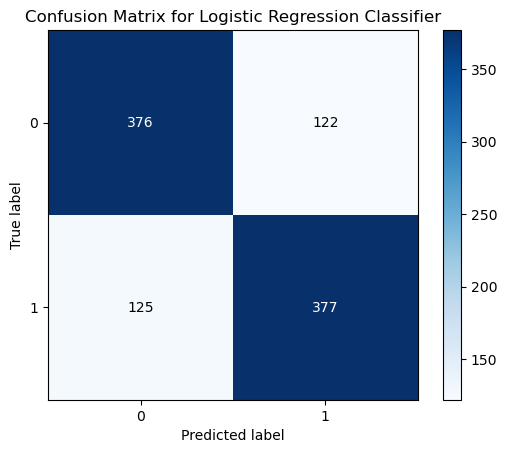

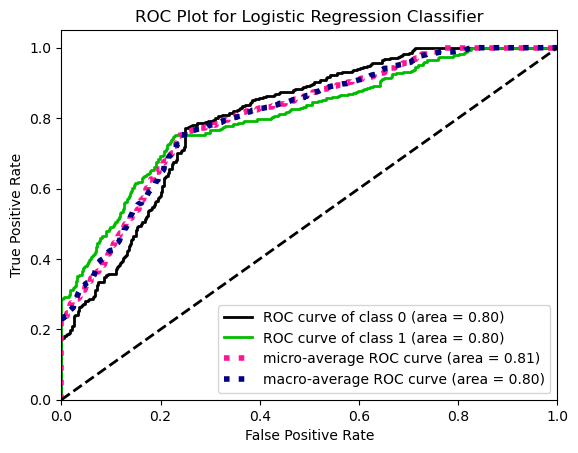

AUC: 0.75

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [4]:
# Logistic Regression Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
from sklearn import metrics

# Importing the dataset
dataset2

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values # Tumoe type


# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
cv_scores = cross_val_score(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000), X_train, y_train, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Make predictions on validation set
y_pred_val = model.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_pred_test = model.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nLogistic Regression Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Visualize the ROC Curve
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Logistic Regression Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())





Cross Validation Scores: [0.64       0.62833333 0.625      0.6        0.61666667]
Average CV Score: 0.622
Validation Accuracy: 0.624
Test Accuracy: 0.638

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       498
           1       1.00      0.28      0.44       502

    accuracy                           0.64      1000
   macro avg       0.79      0.64      0.58      1000
weighted avg       0.79      0.64      0.58      1000

Confusion Matrix:
[[498   0]
 [362 140]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.2789


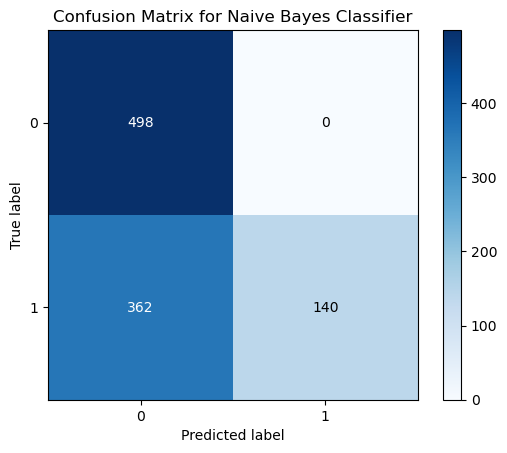

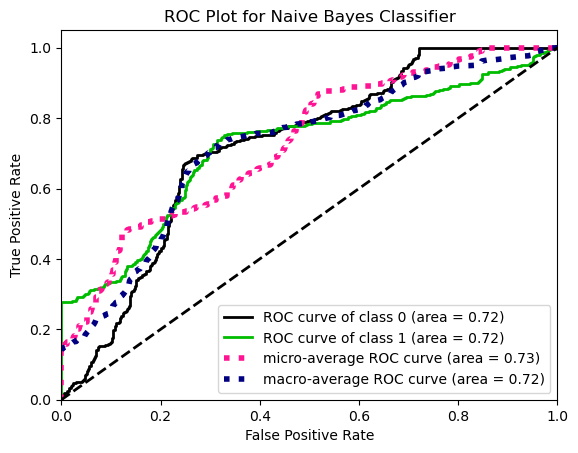

AUC: 0.64
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              0              0.0        1.0   
2                   0.0              0              0.0        0.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1            -1.0              -1.0         0.0  
2             0.0               0.0         0.0  
3             0.0               0.0         0.0  
4             0.0               0.0         0.0  


In [5]:
# Naive Bayes Algorithm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Importing the dataset
dataset2

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Naive Bayes classifier
NBclassifier = GaussianNB()

# Train the model
NBclassifier.fit(X_train, y_train)

# Perform Cross Validation
k = 5
scores = cross_val_score(NBclassifier, X_train, y_train, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = NBclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_predNB = NBclassifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predNB)
print("Test Accuracy:", accuracy)

# Print Classification Report and Confusion Matrix
print("\nNaive Bayes Classifier:")
print(classification_report(y_test, y_predNB))
cm = confusion_matrix(y_test, y_predNB)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize metrics using Scikit-Plot
skplt.metrics.plot_confusion_matrix(y_test, y_predNB, normalize=False, title='Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Visualize the ROC Curve
y_NB_proba = NBclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_NB_proba, title='ROC Plot for Naive Bayes Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = NBclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predNB, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(NBclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print(results_table.head())


Cross Validation Scores: [0.66125 0.62625 0.63625 0.6425  0.6475 ]
Average CV Score: 0.64275
Validation Accuracy: 0.663
Test Accuracy: 0.638

KNN Classifier:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       498
           1       0.64      0.64      0.64       502

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000

Confusion Matrix:
[[319 179]
 [183 319]]
Accuracy for class 0: 0.6406
Accuracy for class 1: 0.6355


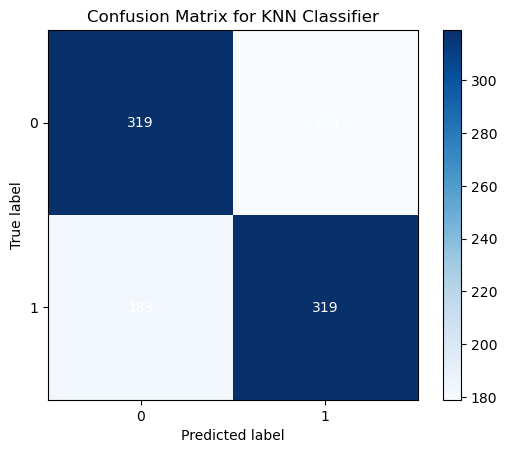

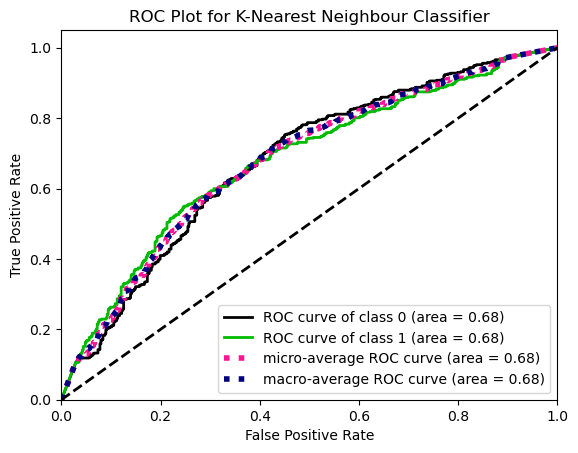

AUC: 0.64

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              1.0        1.0   
1                   1.0              1              0.0        0.0   
2                   0.0              1              0.0        1.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0               0.0         0.0  
1             0.0              -1.0        -1.0  
2             1.0               0.0         1.0  
3             0.0               0.0         0.0  
4             0.0               0.0         0.0  


In [6]:
# KNN Classifier 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

# Importing the dataset
dataset2

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values # Tumor Type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting KNN to the Training Set
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
cv_scores = cross_val_score(knn_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Make predictions on validation set
y_pred_val = knn_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_pred_test = knn_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nKNN Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for KNN Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for K-Nearest Neighbour Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = knn_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(knn_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


In [7]:
# SVC Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset2

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values  #Tumor Type




In [8]:
# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Instantiate the SVC model
SVCclassifier = SVC(C=5, kernel='linear', decision_function_shape="ovr", probability = True, random_state=0)

# Train the model
SVCclassifier.fit(X_train, y_train)
# Perform Cross Validation on training set
k = 5
scores = cross_val_score(SVCclassifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())




Cross Validation Scores: [0.71625 0.7075  0.7125  0.6925  0.70875]
Average CV Score: 0.7074999999999999


In [9]:
# Make predictions on validation set
y_pred_val = SVCclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predSVC = SVCclassifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predSVC)
print("Test Accuracy:", accuracy_test)



Validation Accuracy: 0.697
Test Accuracy: 0.711



SVC Classifier:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       498
           1       0.70      0.75      0.72       502

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000

Confusion Matrix:
[[334 164]
 [125 377]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.7510


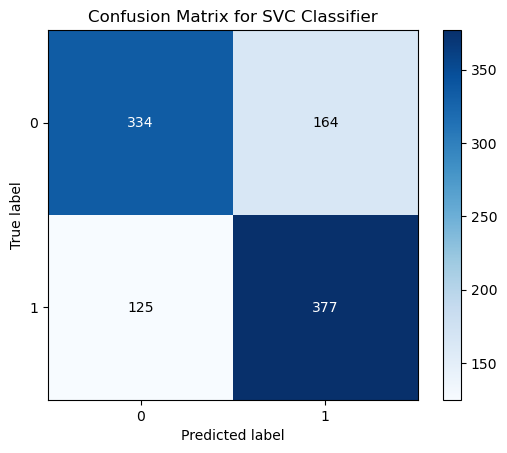

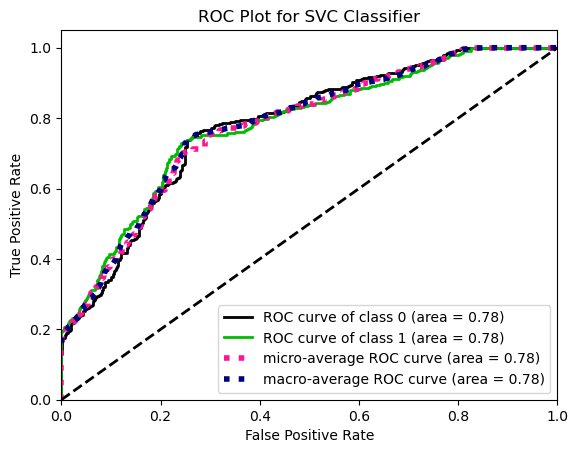

AUC: 0.71

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [10]:
# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_predSVC))
cm = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predSVC, normalize=False, title='Confusion Matrix for SVC Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = SVCclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = SVCclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predSVC, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(SVCclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predSVC, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


Cross Validation Scores: [0.6725  0.63    0.66375 0.6725  0.6725 ]
Average CV Score: 0.66225
Validation Accuracy: 0.683
dt_Accuracy: 0.67


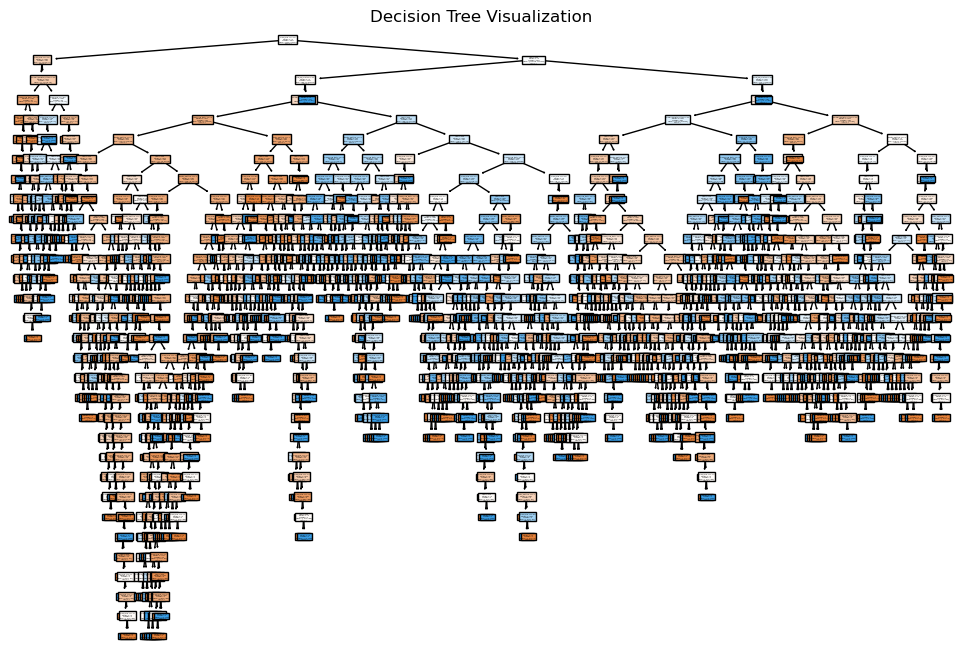


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       498
           1       0.68      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[339 159]
 [171 331]]
Accuracy for class 0: 0.6807
Accuracy for class 1: 0.6594


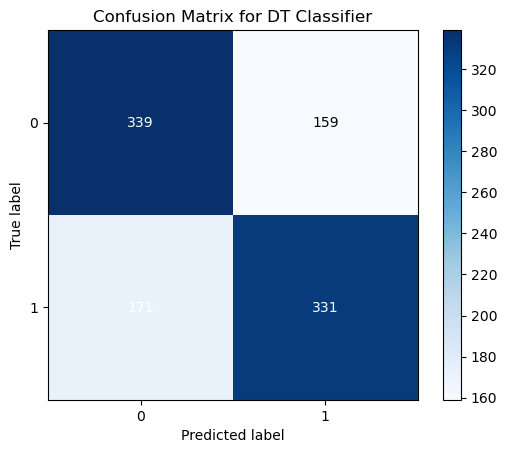

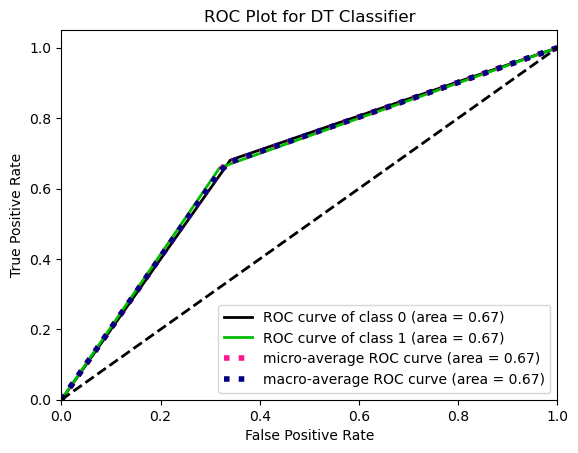

AUC: 0.67

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              1.0        0.0   
1                   1.0              1              0.0        0.0   
2                   0.0              1              0.0        0.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        1.0   

   Training_error  Validation_error  Test_error  
0             0.0               0.0        -1.0  
1             0.0              -1.0        -1.0  
2             1.0               0.0         0.0  
3             0.0               0.0         0.0  
4             0.0               0.0         1.0  


In [12]:
# Decision Tree Classifier without hyperparameter tuning using RandomizedSearch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Importing the dataset
dataset2 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting Decision Tree Classifier to the Training Set
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,
                                       max_features='sqrt', class_weight='balanced', random_state=0)

# Train the model
dt_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_preddt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preddt)
print("dt_Accuracy:", accuracy)

# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()

# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}
Cross Validation Scores: [0.65    0.61625 0.65875 0.65875 0.67875]
Average CV Score: 0.6525
Validation Accuracy: 0.798
DT_Test Accuracy: 0.723


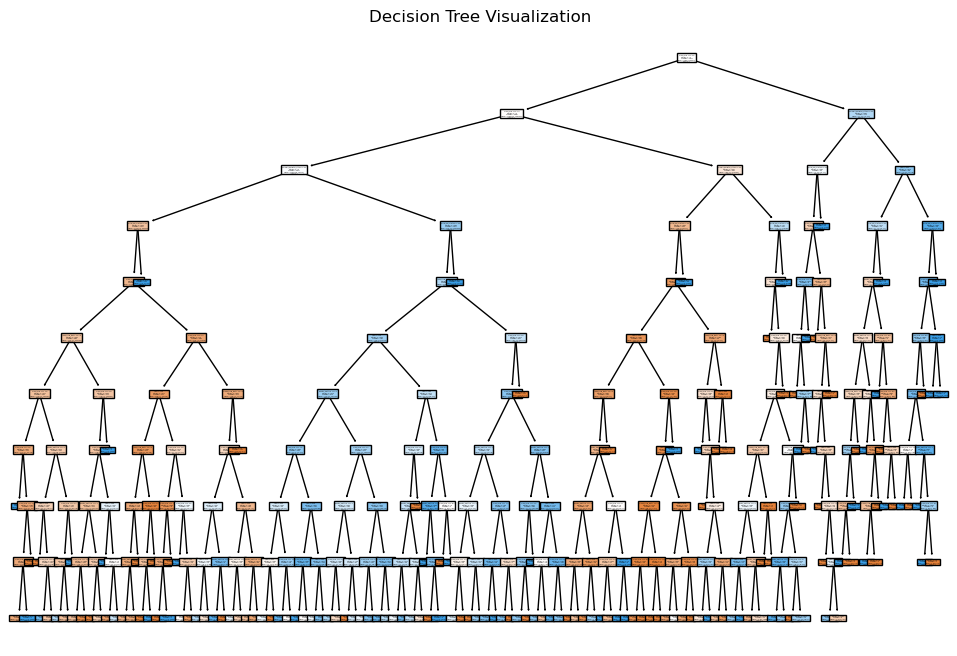


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       498
           1       0.73      0.72      0.72       502

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000

Confusion Matrix:
[[364 134]
 [143 359]]
Accuracy for class 0: 0.7309
Accuracy for class 1: 0.7151


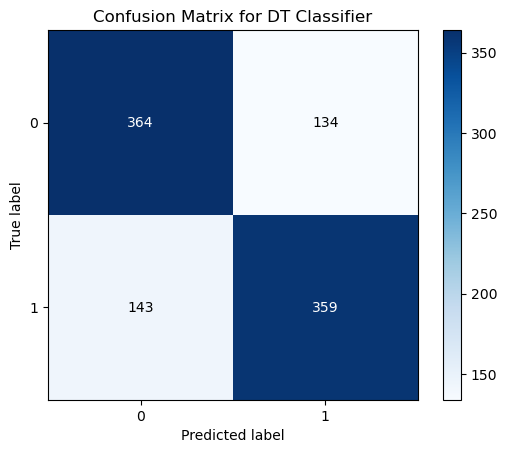

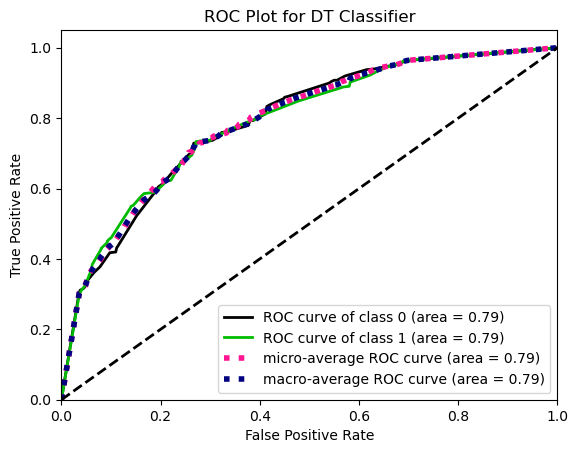

AUC: 0.72

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [13]:
# Decision Tree Classifier with RandomizedSearch hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset2 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values   #Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', None]  # Weights associated with classes
}

# Create an instance of Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_dt_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_preddt = best_dt_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_preddt)
print("DT_Test Accuracy:", accuracy_test)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()


# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

Cross Validation Scores: [0.70375 0.6725  0.6975  0.70375 0.7125 ]
Average CV Score: 0.698
Validation Accuracy: 0.698
rf_Accuracy: 0.708


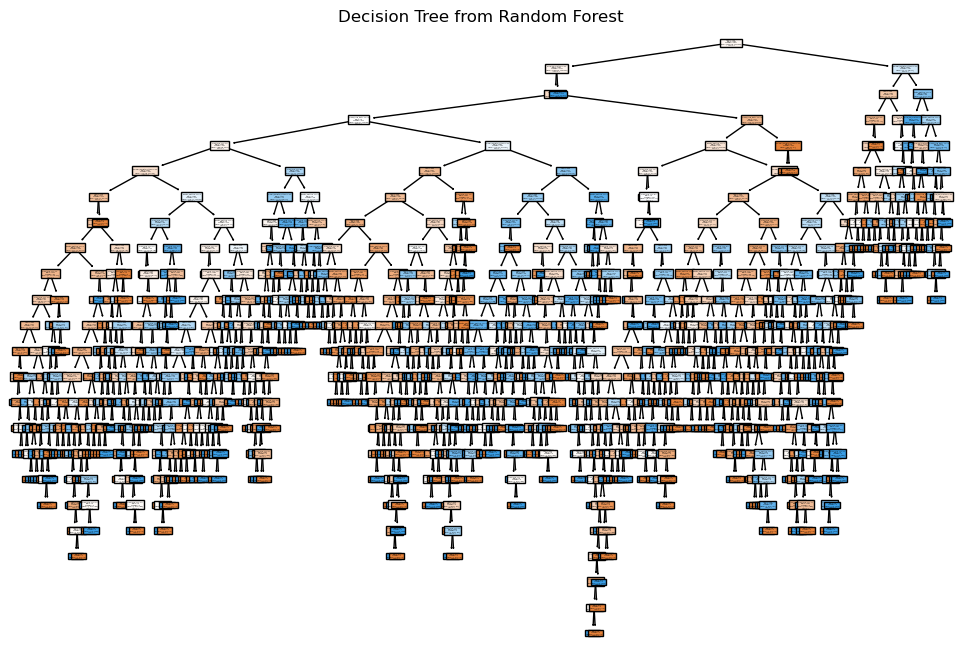


 Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       498
           1       0.71      0.71      0.71       502

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000

Confusion Matrix:
[[354 144]
 [148 354]]
Accuracy for class 0: 0.7108
Accuracy for class 1: 0.7052


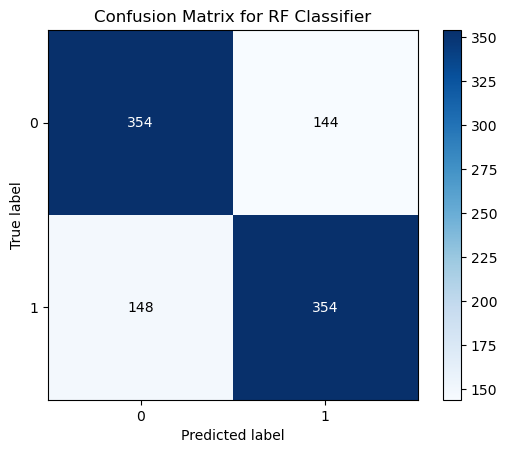

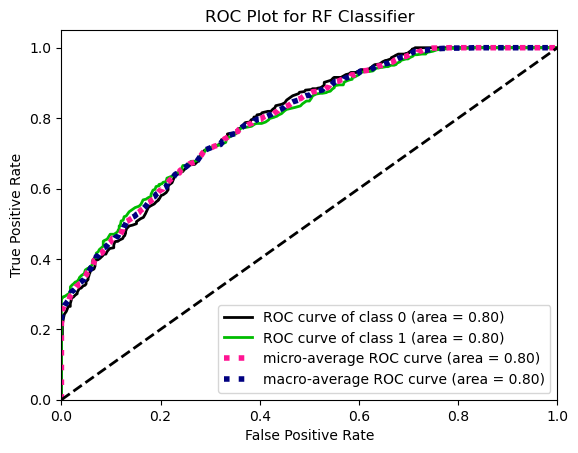

AUC: 0.71

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              1.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              0.0        0.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               0.0         0.0  
3             0.0               0.0         0.0  
4             0.0               0.0         0.0  


In [14]:
# Random Forest Classifier without Hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Importing the dataset
dataset2 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values  #Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting RandomForestClassifier to the Training Set
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,
                                       max_features='sqrt', class_weight='balanced', random_state=0)

# Train the model
rf_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(rf_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = rf_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_predrf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predrf)
print("rf_Accuracy:", accuracy)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 3: Extract a single tree from the random forest (e.g., the first tree)
single_tree = rf_classifier.estimators_[0]

# Step 4: Visualize the single decision tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree from Random Forest")
plt.show()

# Print Classification Report and Confusion Matrix
print("\n Random Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = rf_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predrf, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced_subsample'}
Cross Validation Scores: [0.74875 0.73375 0.7325  0.74    0.7425 ]
Average CV Score: 0.7395
Validation Accuracy: 0.79
rf_Test Accuracy: 0.754


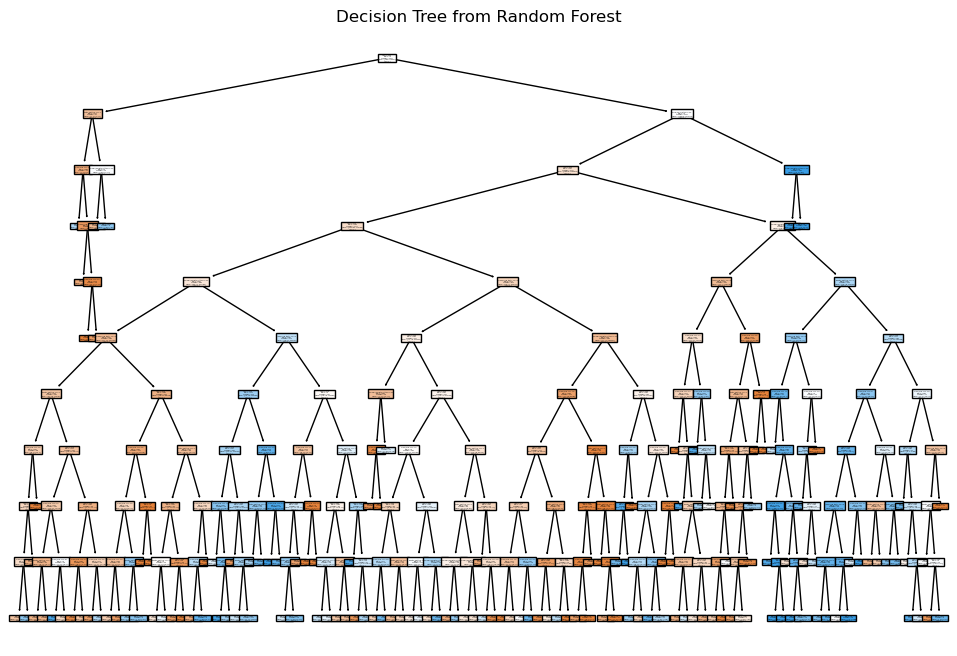


 Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       498
           1       0.76      0.74      0.75       502

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

Confusion Matrix:
[[381 117]
 [129 373]]
Accuracy for class 0: 0.7651
Accuracy for class 1: 0.7430


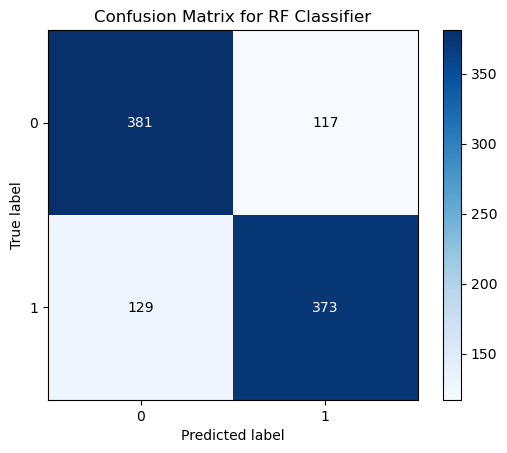

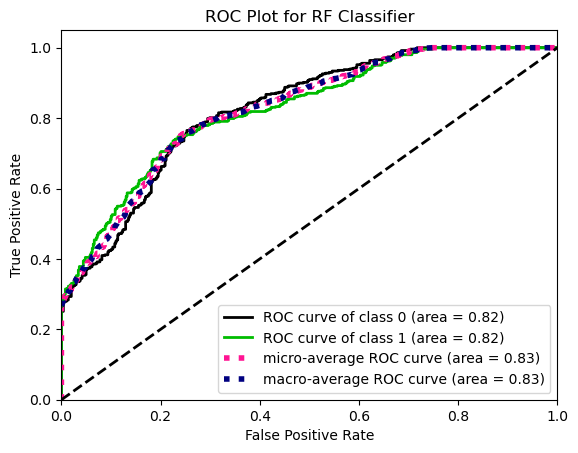

AUC: 0.75

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [15]:
# Random Forest Classifier with Hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset2 

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset2.iloc[:, 0:6].values
y = dataset2.iloc[:, 6].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Create an instance of Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_rf_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(best_rf_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_rf_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("rf_Test Accuracy:", accuracy_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 3: Extract a single tree from the random forest (e.g., the first tree)
single_tree = best_rf_classifier.estimators_[0]

# Step 4: Visualize the single decision tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree from Random Forest")
plt.show()

# Print Classification Report and Confusion Matrix
print("\n Random Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_rf_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predrf, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


In [16]:
dataset2.head()

Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0   58    4.253744                  1                        0   
1   71    7.275465                  1                        0   
2   48    2.392545                  1                        1   
3   34    8.957043                  1                        1   
4   62    3.230391                  0                        0   

   Genetic_Mutation  Metastasis  Tumor_Type  
0                 1           0           0  
1                 2           0           0  
2                 2           0           1  
3                 0           1           1  
4                 2           0           0

In [17]:
# Save the merged data to a new CSV file
dataset2.to_csv('breast_cancer_diagnosis_data.csv', index=False)

In [19]:
dataset3 = dataset2.drop ('Metastasis', axis = 1)
dataset3.head()

Age  Tumor_Size  Lymph_Node_Status  Hormone_Receptor_Status  \
0   58    4.253744                  1                        0   
1   71    7.275465                  1                        0   
2   48    2.392545                  1                        1   
3   34    8.957043                  1                        1   
4   62    3.230391                  0                        0   

   Genetic_Mutation  Tumor_Type  
0                 1           0  
1                 2           0  
2                 2           1  
3                 0           1  
4                 2           0

C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5252 - loss: 0.6924 - val_accuracy: 0.4910 - val_loss: 0.6870
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5610 - loss: 0.6768 - val_accuracy: 0.6550 - val_loss: 0.6685
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6782 - loss: 0.6518 - val_accuracy: 0.6550 - val_loss: 0.6614
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6553 - loss: 0.6550 - val_accuracy: 0.6550 - val_loss: 0.6574
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6633 - loss: 0.6427 - val_accuracy: 0.6550 - val_loss: 0.6538
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6601 - loss: 0.6458 - val_accuracy: 0.6550 - val_loss: 0.6525
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6601 - loss: 0.6426 - val_accuracy: 0.6550 - val_loss: 0.6519
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6710 - loss: 0.6369 - val_accu

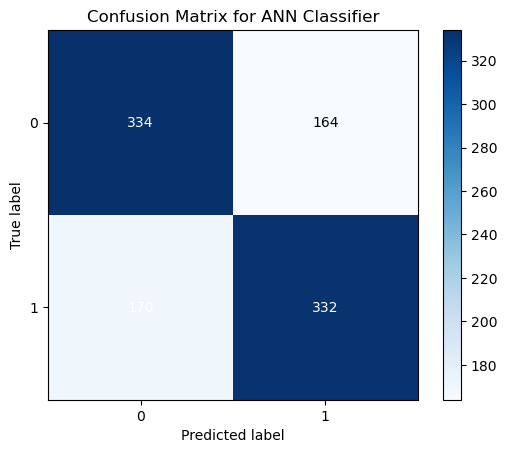

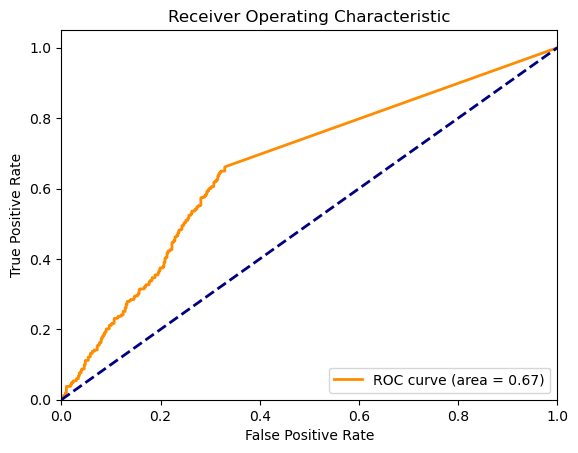

AUC: 0.67


In [21]:
# Artificial Neural Networks 
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt  # Make sure scikit-plot is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Importing the dataset
dataset3
X = dataset3.iloc[:, 0:5].values
y = dataset3.iloc[:, 5].values # Tumor Type

# Splitting the dataset into the Training set, Validation set, and Test set
# First split: Train + Validation and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Second split: Train and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) 
# 0.25 * 0.8 = 0.2 (20% of the original data)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Building the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim=5))

# Adding the second hidden layer
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set with separate validation set
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100)

# Predicting the Test set results
y_pred_proba = classifier.predict(X_test)  # Get probabilities for ROC and AUC
y_pred = (y_pred_proba > 0.5)  # Convert probabilities to class labels

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Classification Report and Confusion Matrix for test set
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# Visualize the ROC Curve
# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")


Cross Validation Scores: [0.65       0.66666667 0.65666667 0.67       0.69333333]
Average CV Score: 0.6673333333333333
Validation Accuracy: 0.655
Test Accuracy: 0.666

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       498
           1       0.67      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[334 164]
 [170 332]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.6614


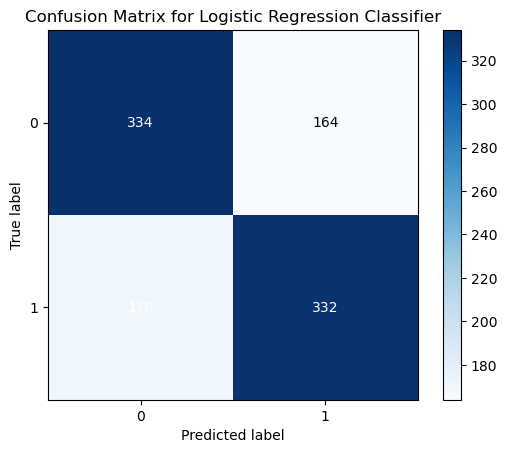

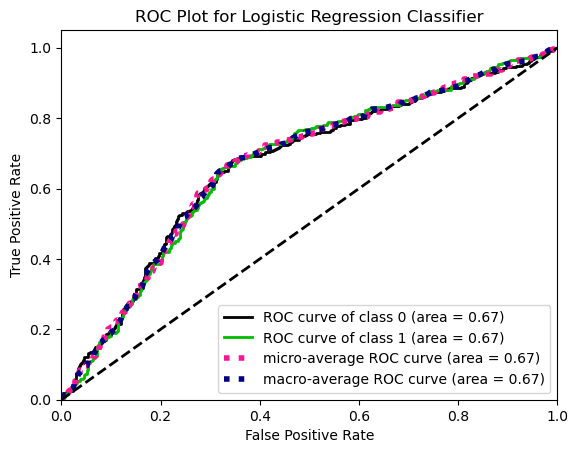

AUC: 0.67

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [22]:
# Logistic Regression Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
from sklearn import metrics

# Importing the dataset
dataset3

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset3.iloc[:, 0:5].values
y = dataset3.iloc[:, 5].values # Tumoe type


# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
cv_scores = cross_val_score(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000), X_train, y_train, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Make predictions on validation set
y_pred_val = model.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_pred_test = model.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nLogistic Regression Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Visualize the ROC Curve
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Logistic Regression Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())





Cross Validation Scores: [0.65       0.66666667 0.65666667 0.67       0.69333333]
Average CV Score: 0.6673333333333333
Validation Accuracy: 0.655
Test Accuracy: 0.666

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       498
           1       0.67      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[334 164]
 [170 332]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.6614


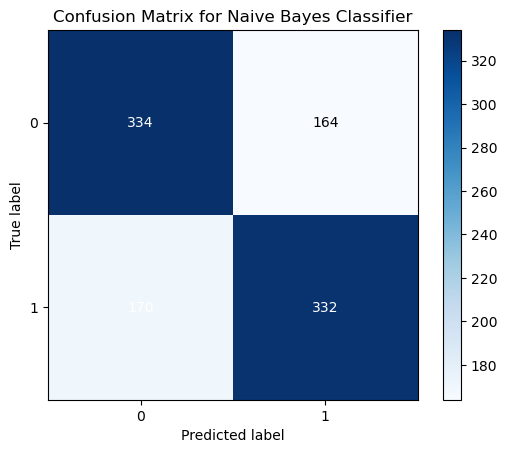

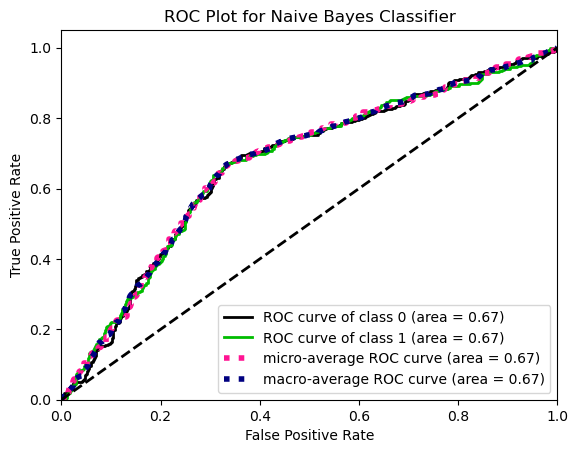

AUC: 0.67
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [23]:
# Naive Bayes Algorithm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Importing the dataset
dataset3

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset3.iloc[:, 0:5].values
y = dataset3.iloc[:, 5].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Naive Bayes classifier
NBclassifier = GaussianNB()

# Train the model
NBclassifier.fit(X_train, y_train)

# Perform Cross Validation
k = 5
scores = cross_val_score(NBclassifier, X_train, y_train, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = NBclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_predNB = NBclassifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predNB)
print("Test Accuracy:", accuracy)

# Print Classification Report and Confusion Matrix
print("\nNaive Bayes Classifier:")
print(classification_report(y_test, y_predNB))
cm = confusion_matrix(y_test, y_predNB)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize metrics using Scikit-Plot
skplt.metrics.plot_confusion_matrix(y_test, y_predNB, normalize=False, title='Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Visualize the ROC Curve
y_NB_proba = NBclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_NB_proba, title='ROC Plot for Naive Bayes Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = NBclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predNB, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(NBclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print(results_table.head())


Cross Validation Scores: [0.58625 0.565   0.55    0.55875 0.575  ]
Average CV Score: 0.567
Validation Accuracy: 0.564
Test Accuracy: 0.541

KNN Classifier:
              precision    recall  f1-score   support

           0       0.54      0.51      0.53       498
           1       0.54      0.57      0.55       502

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000

Confusion Matrix:
[[256 242]
 [217 285]]
Accuracy for class 0: 0.5141
Accuracy for class 1: 0.5677


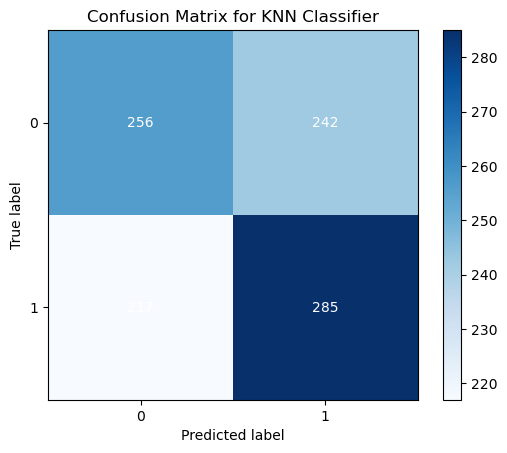

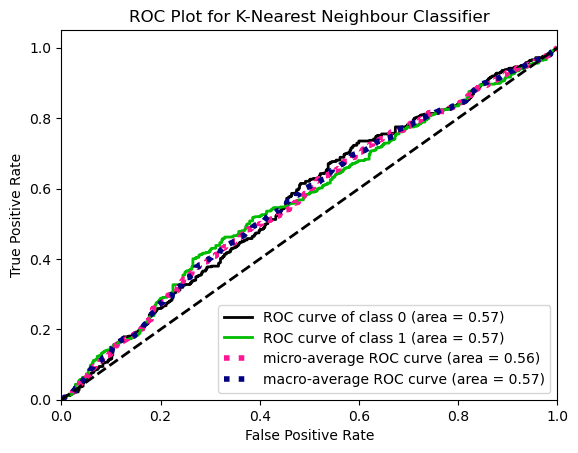

AUC: 0.54

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              1.0        1.0   
1                   1.0              1              0.0        0.0   
2                   0.0              1              0.0        1.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0               0.0         0.0  
1             0.0              -1.0        -1.0  
2             1.0               0.0         1.0  
3             0.0               0.0         0.0  
4             0.0               0.0         0.0  


In [25]:
# KNN Classifier 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

# Importing the dataset
dataset3

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset3.iloc[:, 0:5].values
y = dataset3.iloc[:, 5].values # Tumor Type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting KNN to the Training Set
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski', p=2, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
cv_scores = cross_val_score(knn_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Make predictions on validation set
y_pred_val = knn_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_pred_test = knn_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nKNN Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for KNN Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for K-Nearest Neighbour Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = knn_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(knn_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


In [26]:
# SVC Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
dataset3

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset3.iloc[:, 0:5].values
y = dataset3.iloc[:, 5].values  #Tumor Type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)




In [27]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Instantiate the SVC model
SVCclassifier = SVC(C=5, kernel='linear', decision_function_shape="ovr", probability = True, random_state=0)

# Train the model
SVCclassifier.fit(X_train, y_train)
# Perform Cross Validation on training set
k = 5
scores = cross_val_score(SVCclassifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())



Cross Validation Scores: [0.66625 0.67875 0.67375 0.635   0.6675 ]
Average CV Score: 0.6642499999999999


Validation Accuracy: 0.655
Test Accuracy: 0.666

SVC Classifier:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       498
           1       0.67      0.66      0.67       502

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Confusion Matrix:
[[334 164]
 [170 332]]
Accuracy for class 0: 0.6707
Accuracy for class 1: 0.6614


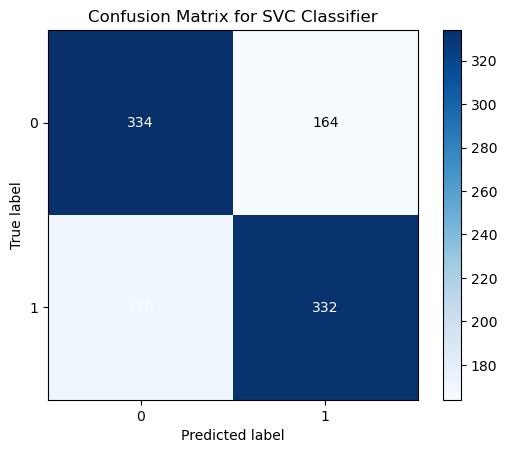

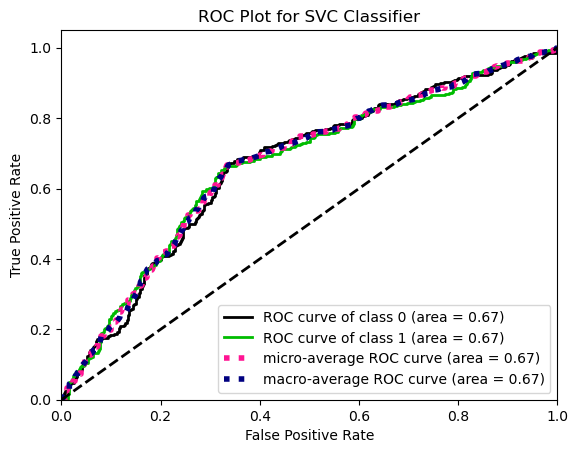

AUC: 0.67

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              1.0        0.0   
3                   0.0              1              0.0        0.0   
4                   0.0              1              0.0        0.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               1.0         0.0  
3             1.0               0.0         0.0  
4             1.0               0.0         0.0  


In [28]:
# Make predictions on validation set
y_pred_val = SVCclassifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_predSVC = SVCclassifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predSVC)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_predSVC))
cm = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predSVC, normalize=False, title='Confusion Matrix for SVC Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = SVCclassifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = SVCclassifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predSVC, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(SVCclassifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predSVC, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())



Cross Validation Scores: [0.5825  0.55    0.56125 0.53875 0.55125]
Average CV Score: 0.55675
Validation Accuracy: 0.571
dt_Accuracy: 0.561


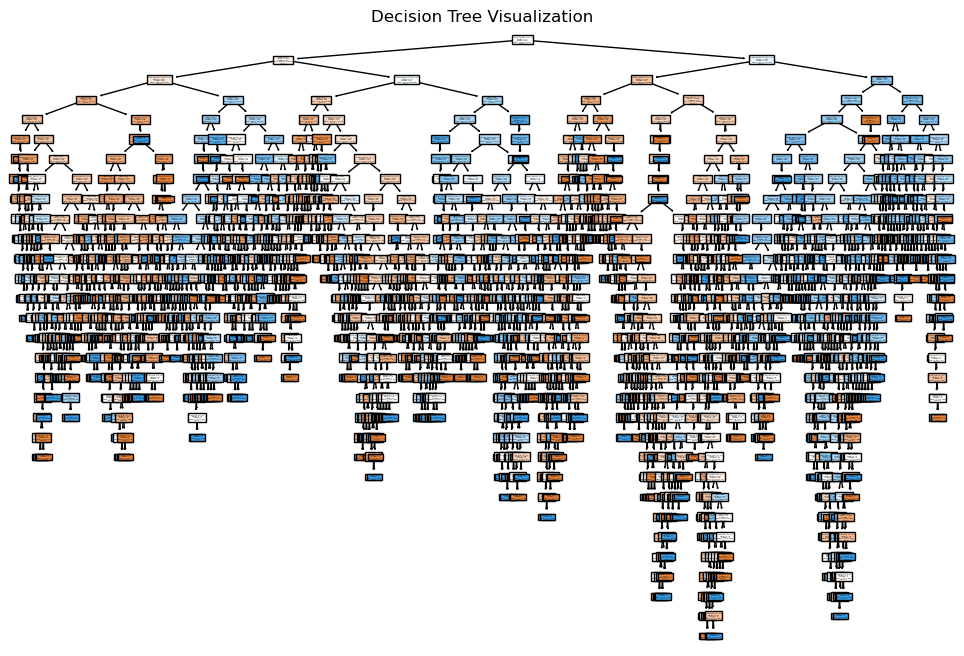


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       498
           1       0.56      0.56      0.56       502

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000

Confusion Matrix:
[[282 216]
 [223 279]]
Accuracy for class 0: 0.5663
Accuracy for class 1: 0.5558


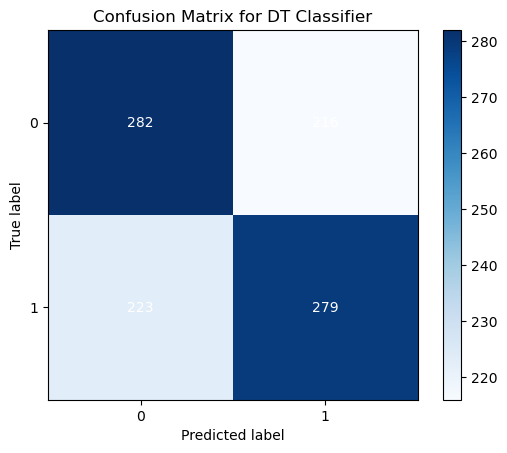

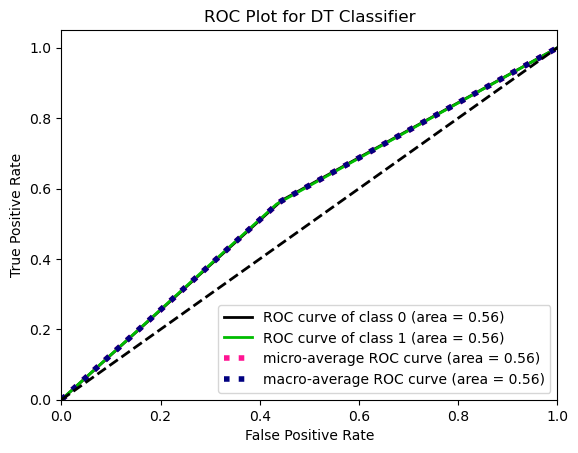

AUC: 0.56

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              1.0        1.0   
1                   1.0              1              0.0        1.0   
2                   0.0              1              0.0        1.0   
3                   0.0              0              0.0        0.0   
4                   0.0              0              0.0        0.0   

   Training_error  Validation_error  Test_error  
0             0.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             1.0               0.0         1.0  
3             0.0               0.0         0.0  
4             0.0               0.0         0.0  


In [29]:
# Decision Tree Classifier without hyperparameter tuning using RandomizedSearch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Importing the dataset
dataset3

# Assuming X contains your independent variables and y contains your dependent variable
X = dataset3.iloc[:, 0:5].values
y = dataset3.iloc[:, 5].values  # Tumor type

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting Decision Tree Classifier to the Training Set
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,
                                       max_features='sqrt', class_weight='balanced', random_state=0)

# Train the model
dt_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 5
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Make predictions on validation set
y_pred_val = dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions
y_preddt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_preddt)
print("dt_Accuracy:", accuracy)

# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=dataset.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()

# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())